In [1]:
#import the package
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import sklearn
from sklearn import metrics
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import linear_model 

#Model Selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import make_scorer
from sklearn.metrics import classification_report

# Importing classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

from sklearn import linear_model 
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier

# Importing required packages for visualization
from IPython.display import Image  
from io import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz

#- import class imbalanced packages
from imblearn import over_sampling 
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.datasets import make_classification


# Importing XGBoost library
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings("ignore")

In [2]:
dfTrace = pd.read_csv('/Users/rparama/Downloads/Dataset/EtherClusterV2.csv')
dfTrace.head()

,token_name,receipt_status,Contract_is_erc20,trace_from_address,trace_to_address,trace_value,trace_gas,trace_gas_used,token_transfer_from_address,token_transfer_to_address,...,transaction_value,transaction_gas,transaction_gas_price,receipt_cumulative_gas_used,receipt_gas_used,token_decimals,token_total_supply,Contract_address,KClusterID,HCluster_id
0,Gastoken.io,0,0,4,4,0.0,127266471.0,125815805.0,2,1,...,0.0,256089852,69400000000,7567350,252218296,2.0,12923228.0,2,1,0.0
1,Gastoken.io,0,0,4,4,0.0,127266471.0,125815805.0,2,1,...,0.0,256089852,69400000000,7567350,252218296,2.0,12923228.0,2,1,0.0
2,Gastoken.io,0,0,4,4,0.0,127266471.0,125815805.0,2,1,...,0.0,256089852,69400000000,7567350,252218296,2.0,12923228.0,2,1,0.0
3,Gastoken.io,1,0,4,2,0.0,4419811.0,1113697.0,3,3,...,0.0,5901184,12008000000,543034,3107288,2.0,12923228.0,1,1,0.0
4,Gastoken.io,1,0,4,2,0.0,4419811.0,1113697.0,3,3,...,0.0,5901184,12008000000,543034,3107288,2.0,12923228.0,1,1,0.0


# Splitting the data into train & test data

In [3]:
# Putting feature variable to X
X= dfTrace[['receipt_status', 
            'Contract_is_erc20',
            'trace_from_address', 
            'trace_to_address', 
            'trace_value', 
            'trace_gas',
            'trace_gas_used', 
            'token_transfer_from_address',
            'token_transfer_to_address', 
            'token_transfer_value',
            'transaction_from_address', 
            'transaction_to_address',
            'transaction_value', 
            'transaction_gas', 
            'transaction_gas_price',
            'receipt_cumulative_gas_used', 
            'receipt_gas_used', 
            'token_decimals',
            'token_total_supply', 
            'Contract_address']]

# Putting response variable to y
y= dfTrace['KClusterID']#class variable

In [4]:
#Code used to split the data set into data set Train and data set test of 80-20
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

print("Number transactions train dataset: ", len(X_train))
print("Number transactions test dataset: ", len(X_test))
print("Total number of transactions: ", len(X_train)+len(X_test))
print("\n")
print("X train Shape ({0},{1})".format(X_train.shape[0], X_train.shape[1]))
print("y train Shape ({0},1)".format(y_train.shape[0]))
print("\n")
print("X test Shape ({0},{1})".format(X_test.shape[0], X_test.shape[1]))
print("y test Shape ({0},1)".format(y_test.shape[0]))

Number transactions train dataset:  63
Number transactions test dataset:  16
Total number of transactions:  79


X train Shape (63,20)
y train Shape (63,1)


X test Shape (16,20)
y test Shape (16,1)


### Preserve X_test & y_test to evaluate on the test data once model is build

In [5]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

102
85
17


# Model building with balancing Classes

### Random Oversampling

In [6]:
#Random Oversampling
#Code used to split the data set into data set Train and data set test of 80-20
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    stratify=y, 
                                                    random_state = 99)

ros = RandomOverSampler(sampling_strategy='minority')
X_train, y_train = ros.fit_resample(X, y)

print(sorted(Counter(y_train).items()))

[(0, 58), (1, 58), (2, 10), (3, 8)]


### Similarly explore other algorithms on balanced dataset by building models like:
- Decision Tree
- Random Forest
- XGBoost

# Decision Tree

In [7]:
# Importing decision tree classifier from sklearn library

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [8]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics


# Making predictions
y_pred_default = dt_default.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.86      1.00      0.92        12
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         2

    accuracy                           0.75        16
   macro avg       0.21      0.25      0.23        16
weighted avg       0.64      0.75      0.69        16



In [9]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))

[[ 0  0  0  0]
 [ 0 12  0  0]
 [ 2  0  0  0]
 [ 0  2  0  0]]
0.75


In [10]:
# Putting features
features = list(dfTrace.columns[1:21])
features

['receipt_status',
 'Contract_is_erc20',
 'trace_from_address',
 'trace_to_address',
 'trace_value',
 'trace_gas',
 'trace_gas_used',
 'token_transfer_from_address',
 'token_transfer_to_address',
 'token_transfer_value',
 'transaction_from_address',
 'transaction_to_address',
 'transaction_value',
 'transaction_gas',
 'transaction_gas_price',
 'receipt_cumulative_gas_used',
 'receipt_gas_used',
 'token_decimals',
 'token_total_supply',
 'Contract_address']

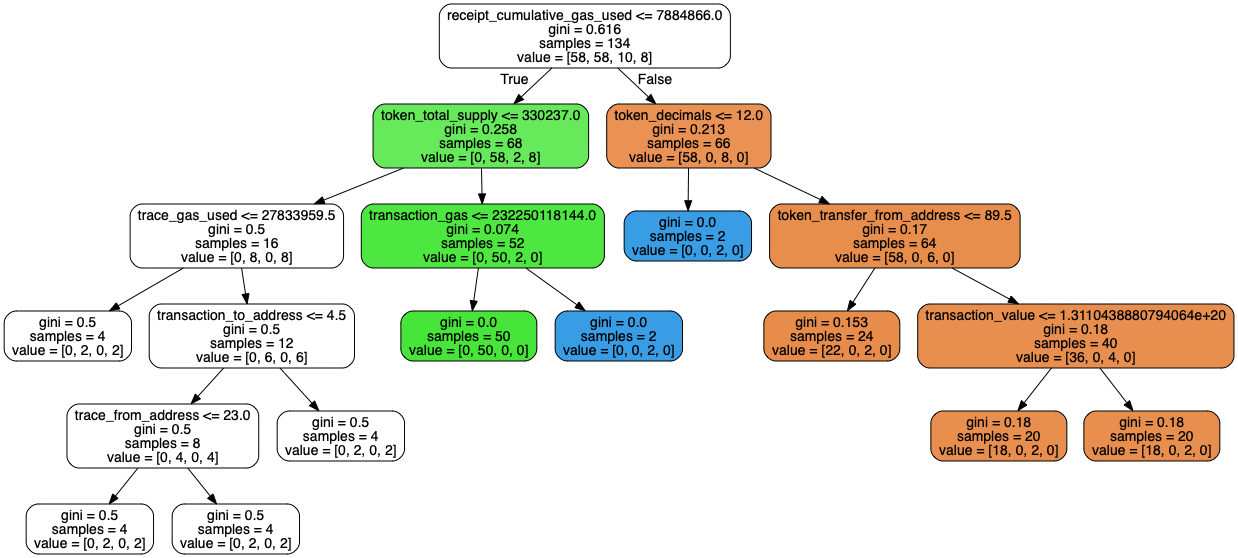

In [11]:
# plotting tree with max_depth=3

dot_data = StringIO()  
export_graphviz(dt_default, out_file=dot_data,
                feature_names=features, filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [12]:
# Tuning max_depth
# specify number of folds for k-fold CV
n_folds = StratifiedKFold(n_splits = 5, shuffle = False, random_state = None)

# parameters to build the model on
parameters = {'max_depth': range(1, 30)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = None)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score=True)
tree.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 30)}, return_train_score=True,
             scoring='accuracy')

In [13]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.002898,0.000587,0.001920,0.000323,1,{'max_depth': 1},0.888889,0.851852,0.851852,0.851852,...,0.865812,0.017151,1,0.859813,0.869159,0.869159,0.869159,0.861111,0.865680,0.004280
1,0.002621,0.000273,0.001756,0.000144,2,{'max_depth': 2},0.888889,0.851852,0.851852,0.703704,...,0.805413,0.073753,15,0.897196,0.906542,0.906542,0.915888,0.898148,0.904863,0.006798
2,0.002649,0.000388,0.001877,0.000334,3,{'max_depth': 3},0.888889,0.851852,0.851852,0.703704,...,0.805413,0.073753,15,0.897196,0.906542,0.906542,0.915888,0.916667,0.908567,0.007165
3,0.002743,0.000272,0.001808,0.000192,4,{'max_depth': 4},0.888889,0.851852,0.851852,0.666667,...,0.798006,0.084651,29,0.897196,0.906542,0.906542,0.915888,0.916667,0.908567,0.007165
4,0.002702,0.000354,0.001725,0.000110,5,{'max_depth': 5},0.888889,0.851852,0.851852,0.703704,...,0.820798,0.063950,2,0.897196,0.906542,0.906542,0.915888,0.916667,0.908567,0.007165


<Figure size 432x288 with 0 Axes>

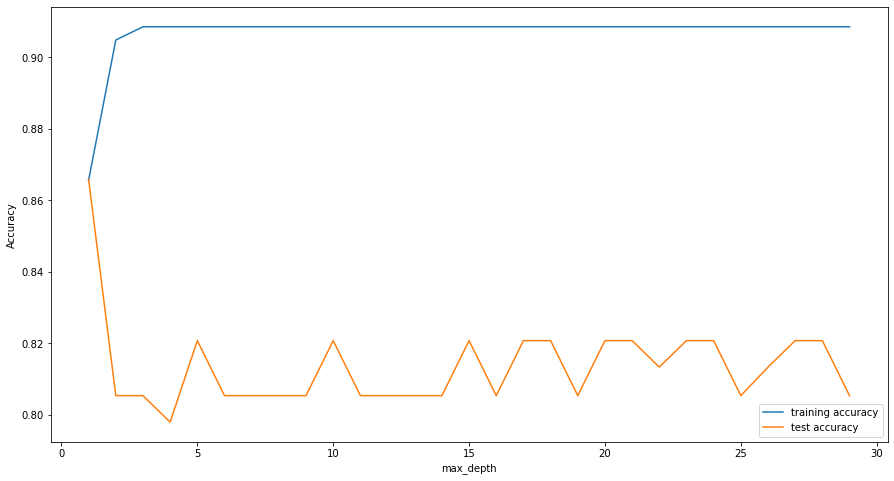

In [14]:
# plotting accuracies with max_depth
plt.figure()
plt.subplots(figsize=(15,8))
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [15]:
# Tuning min_samples_leaf
# specify number of folds for k-fold CV
n_folds = StratifiedKFold(n_splits = 5, shuffle = False, random_state = None)

# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score=True)
tree.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'min_samples_leaf': range(5, 200, 20)},
             return_train_score=True, scoring='accuracy')

In [16]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.002953,0.000367,0.001949,0.000309,5,{'min_samples_leaf': 5},0.777778,0.851852,0.851852,0.703704,...,0.783191,0.060867,3,0.887850,0.897196,0.897196,0.897196,0.898148,0.895517,0.003851
1,0.002762,0.000281,0.001981,0.000527,25,{'min_samples_leaf': 25},0.888889,0.851852,0.851852,0.851852,...,0.865812,0.017151,1,0.859813,0.869159,0.869159,0.869159,0.861111,0.865680,0.004280
2,0.002679,0.000278,0.001770,0.000162,45,{'min_samples_leaf': 45},0.888889,0.851852,0.851852,0.851852,...,0.865812,0.017151,1,0.859813,0.869159,0.869159,0.869159,0.861111,0.865680,0.004280
3,0.002872,0.000462,0.002014,0.000306,65,{'min_samples_leaf': 65},0.444444,0.407407,0.407407,0.407407,...,0.417949,0.014572,4,0.429907,0.439252,0.439252,0.439252,0.435185,0.436570,0.003685
4,0.002621,0.000254,0.001919,0.000261,85,{'min_samples_leaf': 85},0.444444,0.407407,0.407407,0.407407,...,0.417949,0.014572,4,0.429907,0.439252,0.439252,0.439252,0.435185,0.436570,0.003685


<Figure size 432x288 with 0 Axes>

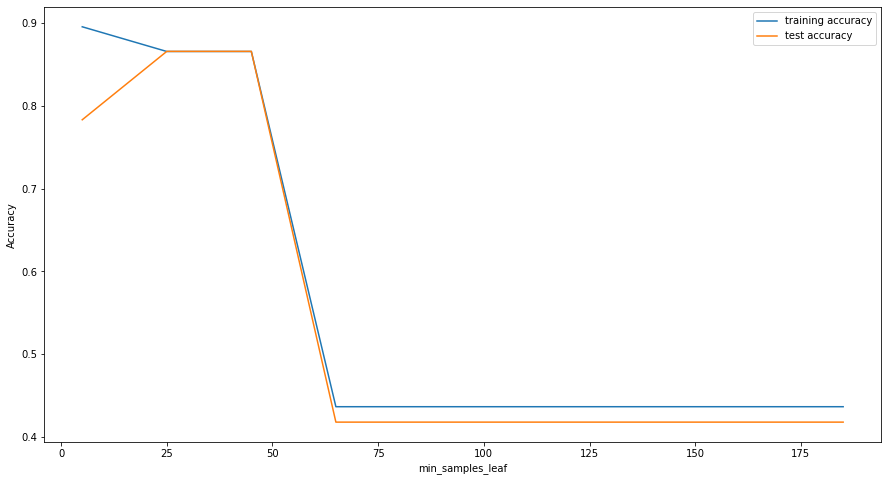

In [17]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.subplots(figsize=(15,8))
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [18]:
# Tuning min_samples_split
# GridSearchCV to find optimal min_samples_split

# specify number of folds for k-fold CV
n_folds = StratifiedKFold(n_splits = 5, shuffle = False, random_state = None)

# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
tree.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'min_samples_split': range(5, 200, 20)},
             return_train_score=True, scoring='accuracy')

In [19]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003152,0.000467,0.002054,0.000353,5,{'min_samples_split': 5},0.888889,0.851852,0.851852,0.703704,...,0.820798,0.063950,4,0.897196,0.906542,0.906542,0.915888,0.916667,0.908567,0.007165
1,0.002727,0.000246,0.001998,0.000334,25,{'min_samples_split': 25},0.888889,0.851852,0.851852,0.703704,...,0.820798,0.063950,4,0.897196,0.906542,0.906542,0.915888,0.916667,0.908567,0.007165
2,0.002824,0.000334,0.001717,0.000147,45,{'min_samples_split': 45},0.888889,0.851852,0.851852,0.703704,...,0.820798,0.063950,4,0.897196,0.906542,0.906542,0.915888,0.916667,0.908567,0.007165
3,0.003024,0.000626,0.001727,0.000150,65,{'min_samples_split': 65},0.888889,0.851852,0.851852,0.851852,...,0.865812,0.017151,1,0.859813,0.869159,0.869159,0.869159,0.861111,0.865680,0.004280
4,0.002860,0.000316,0.001823,0.000122,85,{'min_samples_split': 85},0.888889,0.851852,0.851852,0.851852,...,0.865812,0.017151,1,0.859813,0.869159,0.869159,0.869159,0.861111,0.865680,0.004280


<Figure size 432x288 with 0 Axes>

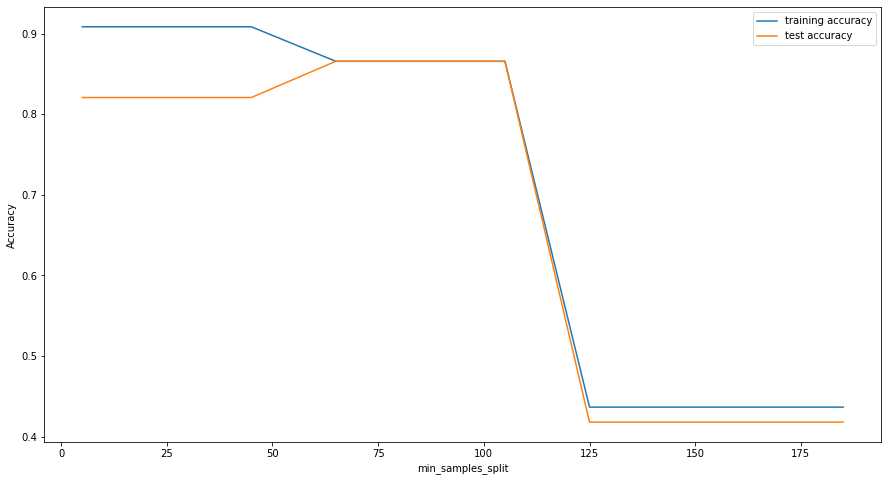

In [20]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.subplots(figsize=(15,8))
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [21]:
# Grid Search to Find Optimal Hyperparameters
# Create the parameter grid 
param_grid = {
    'max_depth': range(1, 10),
    'min_samples_leaf': range(1, 25),
    'min_samples_split': range(1,50),
    'criterion': ["entropy", "gini"]
}

n_folds = StratifiedKFold(n_splits = 5, shuffle = False, random_state = None)

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1, return_train_score=True)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 21168 candidates, totalling 105840 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 105840 out of 105840 | elapsed:  8.2min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 25),
                         'min_samples_split': range(1, 50)},
             return_train_score=True, verbose=1)

In [22]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.002318,0.000193,0.000000,0.000000,entropy,1,1,1,"{'criterion': 'entropy', 'max_depth': 1, 'min_...",NaN,...,NaN,NaN,21168,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.002659,0.000235,0.001746,0.000123,entropy,1,1,2,"{'criterion': 'entropy', 'max_depth': 1, 'min_...",0.888889,...,0.865812,0.017151,1,0.859813,0.869159,0.869159,0.869159,0.861111,0.86568,0.00428
2,0.002346,0.000081,0.001851,0.000365,entropy,1,1,3,"{'criterion': 'entropy', 'max_depth': 1, 'min_...",0.888889,...,0.865812,0.017151,1,0.859813,0.869159,0.869159,0.869159,0.861111,0.86568,0.00428
3,0.002424,0.000193,0.001913,0.000433,entropy,1,1,4,"{'criterion': 'entropy', 'max_depth': 1, 'min_...",0.888889,...,0.858405,0.026841,5991,0.859813,0.869159,0.869159,0.869159,0.861111,0.86568,0.00428
4,0.002420,0.000345,0.001688,0.000188,entropy,1,1,5,"{'criterion': 'entropy', 'max_depth': 1, 'min_...",0.888889,...,0.865812,0.017151,1,0.859813,0.869159,0.869159,0.869159,0.861111,0.86568,0.00428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21163,0.002133,0.000144,0.001608,0.000116,gini,9,24,45,"{'criterion': 'gini', 'max_depth': 9, 'min_sam...",0.888889,...,0.858405,0.026841,5991,0.859813,0.869159,0.869159,0.869159,0.861111,0.86568,0.00428
21164,0.002155,0.000081,0.001633,0.000277,gini,9,24,46,"{'criterion': 'gini', 'max_depth': 9, 'min_sam...",0.888889,...,0.858405,0.026841,5991,0.859813,0.869159,0.869159,0.869159,0.861111,0.86568,0.00428
21165,0.002374,0.000272,0.001612,0.000139,gini,9,24,47,"{'criterion': 'gini', 'max_depth': 9, 'min_sam...",0.888889,...,0.865812,0.017151,1,0.859813,0.869159,0.869159,0.869159,0.861111,0.86568,0.00428
21166,0.002242,0.000016,0.001685,0.000098,gini,9,24,48,"{'criterion': 'gini', 'max_depth': 9, 'min_sam...",0.888889,...,0.858405,0.026841,5991,0.859813,0.869159,0.869159,0.869159,0.861111,0.86568,0.00428


In [23]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.865811965811966
DecisionTreeClassifier(criterion='entropy', max_depth=1)


In [24]:
# tree with max_depth = 3
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=10,
                                  min_samples_split=50)
clf_gini.fit(X_train, y_train)

# score
print(clf_gini.score(X_test,y_test))

0.75


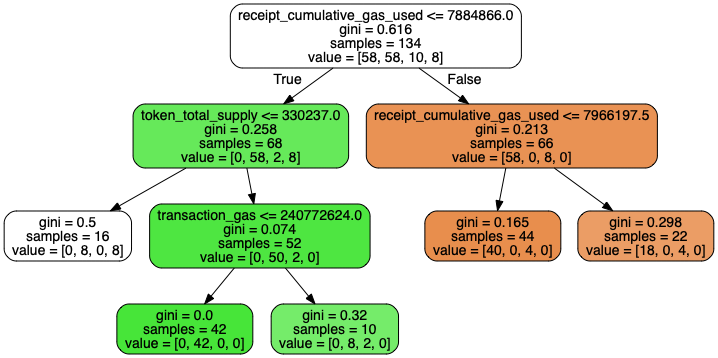

In [25]:
# plotting the tree
dot_data = StringIO()  
export_graphviz(clf_gini, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [26]:
# classification metrics
y_pred = clf_gini.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.86      1.00      0.92        12
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         2

    accuracy                           0.75        16
   macro avg       0.21      0.25      0.23        16
weighted avg       0.64      0.75      0.69        16



In [27]:
# confusion matrix
print(confusion_matrix(y_test,y_pred))

[[ 0  0  0  0]
 [ 0 12  0  0]
 [ 2  0  0  0]
 [ 0  2  0  0]]


# Random Forest

In [28]:
# Running the random forest with default parameters.
rfc = RandomForestClassifier()

# fit
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [29]:
# Making predictions
predictions = rfc.predict(X_test)

In [30]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.86      1.00      0.92        12
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         2

    accuracy                           0.75        16
   macro avg       0.21      0.25      0.23        16
weighted avg       0.64      0.75      0.69        16



In [31]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))

[[ 0  0  0  0]
 [ 0 12  0  0]
 [ 2  0  0  0]
 [ 0  2  0  0]]


In [32]:
print(accuracy_score(y_test,predictions))

0.75


In [33]:
# Tuning max_features

# specify number of folds for k-fold CV
n_folds = StratifiedKFold(n_splits = 5, shuffle = False, random_state = None)

# parameters to build the model on
parameters = {'max_features': [2,4,6,8,10,12,14,16,18,20]}

# instantiate the model
rf = RandomForestClassifier(max_depth=10)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", 
                  return_train_score=True)

rf.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(max_depth=10),
             param_grid={'max_features': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]},
             return_train_score=True, scoring='accuracy')

In [34]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.094329,0.012966,0.007137,0.000138,2,{'max_features': 2},0.888889,0.851852,0.851852,0.740741,...,0.812821,0.064438,2,0.897196,0.906542,0.906542,0.915888,0.916667,0.908567,0.007165
1,0.096535,0.004440,0.007845,0.000379,4,{'max_features': 4},0.888889,0.851852,0.851852,0.740741,...,0.812821,0.064438,2,0.897196,0.906542,0.906542,0.915888,0.916667,0.908567,0.007165
2,0.099659,0.011285,0.008413,0.001375,6,{'max_features': 6},0.888889,0.851852,0.851852,0.740741,...,0.812821,0.064438,2,0.897196,0.906542,0.906542,0.915888,0.916667,0.908567,0.007165
3,0.115935,0.002047,0.009478,0.000543,8,{'max_features': 8},0.888889,0.851852,0.851852,0.703704,...,0.805413,0.073753,7,0.897196,0.906542,0.906542,0.915888,0.916667,0.908567,0.007165
4,0.112392,0.008362,0.009182,0.000629,10,{'max_features': 10},0.888889,0.851852,0.851852,0.703704,...,0.820798,0.063950,1,0.897196,0.906542,0.906542,0.915888,0.916667,0.908567,0.007165


<Figure size 432x288 with 0 Axes>

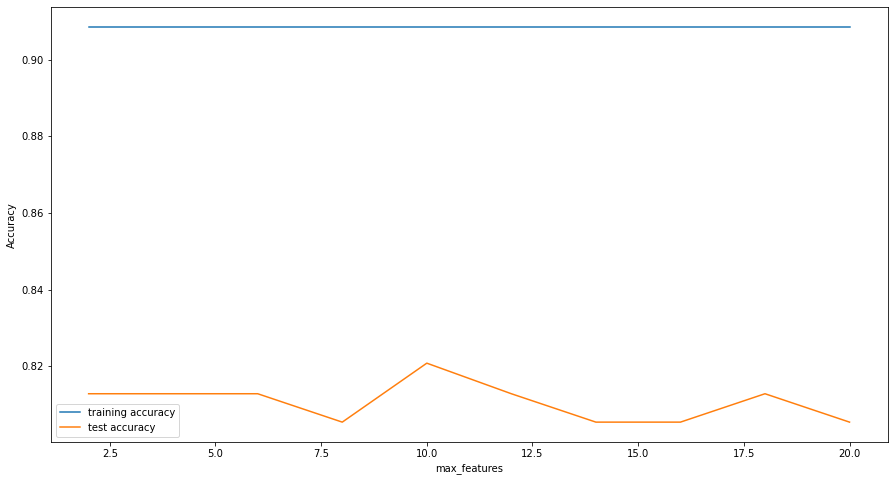

In [35]:
# plotting accuracies with max_features
plt.figure()
plt.subplots(figsize=(15,8))
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [36]:
# Tuning min_samples_leaf
# GridSearchCV to find optimal min_samples_leaf
# specify number of folds for k-fold CV
n_folds = StratifiedKFold(n_splits = 5, shuffle = False, random_state = None)

# parameters to build the model on
parameters = {'min_samples_leaf': range(1,25)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", 
                  return_train_score=True)

rf.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(),
             param_grid={'min_samples_leaf': range(1, 25)},
             return_train_score=True, scoring='accuracy')

In [37]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.129822,0.004450,0.010797,0.000262,1,{'min_samples_leaf': 1},0.888889,0.851852,0.851852,0.740741,...,0.812821,0.064438,21,0.897196,0.906542,0.906542,0.915888,0.916667,0.908567,0.007165
1,0.125749,0.006074,0.010978,0.000147,2,{'min_samples_leaf': 2},0.888889,0.851852,0.851852,0.703704,...,0.805413,0.073753,23,0.897196,0.906542,0.906542,0.915888,0.916667,0.908567,0.007165
2,0.121887,0.012878,0.009825,0.001390,3,{'min_samples_leaf': 3},0.888889,0.851852,0.851852,0.703704,...,0.805413,0.073753,23,0.897196,0.906542,0.906542,0.897196,0.898148,0.901125,0.004437
3,0.112032,0.020033,0.009272,0.001864,4,{'min_samples_leaf': 4},0.888889,0.851852,0.851852,0.740741,...,0.812821,0.064438,21,0.859813,0.869159,0.869159,0.897196,0.898148,0.878695,0.015869
4,0.121898,0.012174,0.010018,0.001464,5,{'min_samples_leaf': 5},0.888889,0.851852,0.851852,0.777778,...,0.827920,0.046522,16,0.859813,0.869159,0.869159,0.887850,0.888889,0.874974,0.011462


<Figure size 432x288 with 0 Axes>

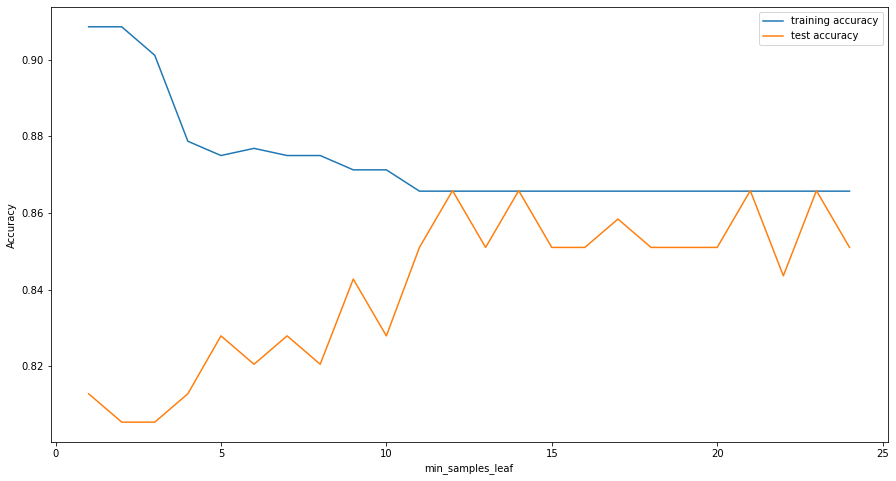

In [38]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.subplots(figsize=(15,8))
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [39]:
# Tuning min_samples_split
# GridSearchCV to find optimal min_samples_split
# specify number of folds for k-fold CV
n_folds = StratifiedKFold(n_splits = 5, shuffle = False, random_state = None)

# parameters to build the model on
parameters = {'min_samples_split': range(1, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", 
                  return_train_score=True)

rf.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(),
             param_grid={'min_samples_split': range(1, 50)},
             return_train_score=True, scoring='accuracy')

In [40]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.041906,0.003888,0.000000,0.000000,1,{'min_samples_split': 1},NaN,NaN,NaN,NaN,...,NaN,NaN,49,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.112276,0.004270,0.009308,0.000438,2,{'min_samples_split': 2},0.888889,0.851852,0.851852,0.703704,...,0.805413,0.073753,38,0.897196,0.906542,0.906542,0.915888,0.916667,0.908567,0.007165
2,0.097535,0.006478,0.007997,0.000626,3,{'min_samples_split': 3},0.888889,0.851852,0.851852,0.740741,...,0.812821,0.064438,28,0.897196,0.906542,0.906542,0.915888,0.916667,0.908567,0.007165
3,0.112153,0.014313,0.009232,0.001184,4,{'min_samples_split': 4},0.888889,0.851852,0.851852,0.703704,...,0.805413,0.073753,38,0.897196,0.906542,0.906542,0.915888,0.916667,0.908567,0.007165
4,0.112742,0.002932,0.009054,0.000399,5,{'min_samples_split': 5},0.888889,0.851852,0.851852,0.703704,...,0.805413,0.073753,38,0.897196,0.906542,0.906542,0.915888,0.916667,0.908567,0.007165


<Figure size 432x288 with 0 Axes>

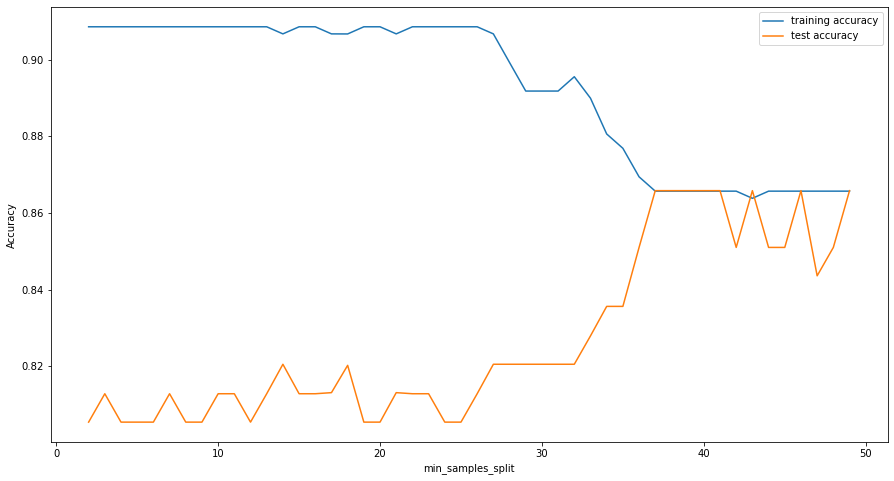

In [41]:
# plotting accuracies with min_samples_split
plt.figure()
plt.subplots(figsize=(15,8))
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [42]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [2,4,6,8,10],
    'min_samples_leaf': range(1,10),
    'min_samples_split': range(1,35),
    'n_estimators': [100,200, 300], 
    'max_features': [2,4,6,8]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1, return_train_score=True)

In [43]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 18360 candidates, totalling 55080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   31.7s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 2426 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 3176 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 4026 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 4976 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 6026 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 7176 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-1)]: Done 8426 tasks      | elapsed: 10.3min
[Parallel(n_jobs=-1)]: Done 9776 tasks      | elapsed: 11.8min
[Parallel(n_jobs=-1)]: Done 11226 tasks      

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 6, 8, 10],
                         'max_features': [2, 4, 6, 8],
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(1, 35),
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, verbose=1)

In [44]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8202020202020203 using {'max_depth': 2, 'max_features': 2, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 100}


In [45]:
# Fitting the final model with the best parameters obtained from grid search.
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=2,
                             min_samples_leaf=1, 
                             min_samples_split=3,
                             max_features=2,
                             n_estimators=200)

In [46]:
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=2, max_features=2, min_samples_split=3,
                       n_estimators=200)

In [47]:
# evaluation metrics
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.86      1.00      0.92        12
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         2

    accuracy                           0.75        16
   macro avg       0.21      0.25      0.23        16
weighted avg       0.64      0.75      0.69        16

[[ 0  0  0  0]
 [ 0 12  0  0]
 [ 2  0  0  0]
 [ 0  2  0  0]]


# XGBoost

In [48]:
# Fitting the decision tree with default hyperparameters, apart from
model = XGBClassifier()
model.fit(X_train, y_train)

[02:56:20] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

[02:56:20] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:56:20] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:56:20] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:56:20] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1

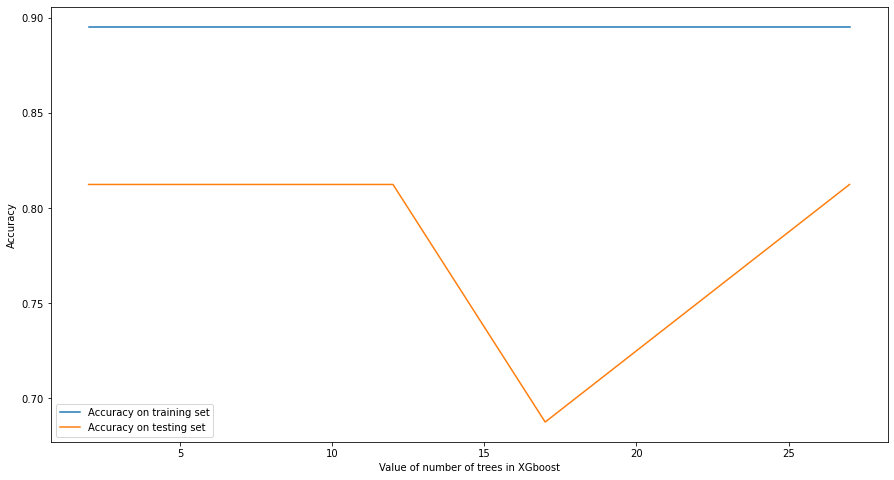

In [49]:
tree_range = range(2, 30, 5)
score1=[]
score2=[]
for tree in tree_range:
    xgb=XGBClassifier(n_estimators=tree)
    xgb.fit(X_train,y_train)
    score1.append(xgb.score(X_train,y_train))
    score2.append(xgb.score(X_test,y_test))
    
%matplotlib inline
plt.subplots(figsize=(15,8))
plt.plot(tree_range,score1,label= 'Accuracy on training set')
plt.plot(tree_range,score2,label= 'Accuracy on testing set')
plt.xlabel('Value of number of trees in XGboost')
plt.ylabel('Accuracy')
plt.legend()

In [50]:
# make predictions for test data
# use predict_proba since we need probabilities to compute auc
y_pred = model.predict_proba(X_test)
y_pred[:10]

array([[3.5792147e-04, 9.9867994e-01, 2.8817399e-04, 6.7394308e-04],
       [9.1342497e-01, 1.2893166e-03, 8.3463646e-02, 1.8221022e-03],
       [3.7121380e-04, 9.9827707e-01, 6.5276551e-04, 6.9897203e-04],
       [3.5792147e-04, 9.9867994e-01, 2.8817399e-04, 6.7394308e-04],
       [3.8659497e-04, 9.9863750e-01, 3.1125997e-04, 6.6458754e-04],
       [8.0650486e-03, 4.9633145e-01, 6.4015961e-03, 4.8920196e-01],
       [3.5792147e-04, 9.9867994e-01, 2.8817399e-04, 6.7394308e-04],
       [6.3342886e-04, 9.9853802e-01, 5.0999381e-04, 3.1852504e-04],
       [3.7121720e-04, 9.9828619e-01, 6.4354052e-04, 6.9897843e-04],
       [9.1342497e-01, 1.2893166e-03, 8.3463646e-02, 1.8221022e-03]],
      dtype=float32)

In [51]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = StratifiedKFold(n_splits = 5, shuffle = False, random_state = None)

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          

# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 

                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)

In [52]:
# fit the model
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[02:56:21] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:56:21] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:56:21] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:56:21] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:56:22] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1

[02:56:27] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:56:27] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    6.7s finished


[02:56:27] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=2, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=200, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=Non

In [53]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.217356,0.011955,0.003316,0.000234,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.888889,0.851852,0.851852,...,0.828205,0.050738,1,0.897196,0.906542,0.906542,0.915888,0.916667,0.908567,0.007165
1,0.223734,0.008396,0.003504,0.000345,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.888889,0.851852,0.851852,...,0.828205,0.050738,1,0.897196,0.906542,0.906542,0.915888,0.916667,0.908567,0.007165
2,0.218577,0.008925,0.003475,0.000267,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.888889,0.851852,0.851852,...,0.828205,0.050738,1,0.897196,0.906542,0.906542,0.915888,0.916667,0.908567,0.007165
3,0.194977,0.028311,0.002927,0.000094,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.888889,0.851852,0.851852,...,0.812821,0.064438,6,0.897196,0.906542,0.906542,0.915888,0.916667,0.908567,0.007165
4,0.207058,0.013908,0.003076,0.000156,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.888889,0.851852,0.851852,...,0.828205,0.050738,1,0.897196,0.906542,0.906542,0.915888,0.916667,0.908567,0.007165
5,0.222381,0.010939,0.003312,0.000135,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.888889,0.851852,0.851852,...,0.828205,0.050738,1,0.897196,0.906542,0.906542,0.915888,0.916667,0.908567,0.007165


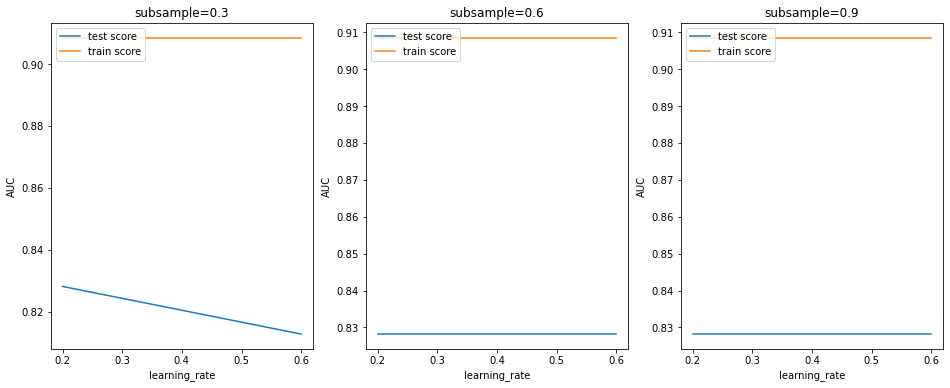

In [54]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    #plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    #plt.xscale('log')

In [55]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for auc

#The results show that a subsample size of 0.6 and learning_rate of about 0.2 seems optimal.
#Also, XGBoost has resulted in the highest ROC AUC obtained (across various hyperparameters).

params = {'learning_rate': 0.2,
          'max_depth': 10, 
          'n_estimators':100,
          'subsample':0.6,
         'objective':'binary:logistic'}

# fit model on training data
model = XGBClassifier(params = params)
model.fit(X_train, y_train)

[02:56:28] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:541: 
Parameters: { params } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[02:56:28] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1,
              objective='multi:softprob',
              params={'learning_rate': 0.2, 'max_depth': 10,
                      'n_estimators': 100, 'objective': 'binary:logistic',
                      'subsample': 0.6},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [56]:
y_pred = model.predict_proba(X_test)
y_pred[:10]

array([[3.5792147e-04, 9.9867994e-01, 2.8817399e-04, 6.7394308e-04],
       [9.1342497e-01, 1.2893166e-03, 8.3463646e-02, 1.8221022e-03],
       [3.7121380e-04, 9.9827707e-01, 6.5276551e-04, 6.9897203e-04],
       [3.5792147e-04, 9.9867994e-01, 2.8817399e-04, 6.7394308e-04],
       [3.8659497e-04, 9.9863750e-01, 3.1125997e-04, 6.6458754e-04],
       [8.0650486e-03, 4.9633145e-01, 6.4015961e-03, 4.8920196e-01],
       [3.5792147e-04, 9.9867994e-01, 2.8817399e-04, 6.7394308e-04],
       [6.3342886e-04, 9.9853802e-01, 5.0999381e-04, 3.1852504e-04],
       [3.7121720e-04, 9.9828619e-01, 6.4354052e-04, 6.9897843e-04],
       [9.1342497e-01, 1.2893166e-03, 8.3463646e-02, 1.8221022e-03]],
      dtype=float32)

In [57]:
sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=model.predict(X_test)
)

print(sk_report)

              precision    recall  f1-score   support

           0   0.000000  0.000000  0.000000         0
           1   0.923077  1.000000  0.960000        12
           2   0.000000  0.000000  0.000000         2
           3   1.000000  0.500000  0.666667         2

    accuracy                       0.812500        16
   macro avg   0.480769  0.375000  0.406667        16
weighted avg   0.817308  0.812500  0.803333        16



In [58]:
# feature importance
importance = dict(zip(X_train.columns, model.feature_importances_))
importance

{'receipt_status': 5.076114e-05,
 'Contract_is_erc20': 4.8627247e-05,
 'trace_from_address': 0.0017108398,
 'trace_to_address': 0.009884122,
 'trace_value': 0.0,
 'trace_gas': 0.0041836556,
 'trace_gas_used': 0.008380024,
 'token_transfer_from_address': 0.017789748,
 'token_transfer_to_address': 0.0008551687,
 'token_transfer_value': 0.4430872,
 'transaction_from_address': 0.00045023597,
 'transaction_to_address': 0.0001653937,
 'transaction_value': 0.0,
 'transaction_gas': 0.0,
 'transaction_gas_price': 0.017219445,
 'receipt_cumulative_gas_used': 0.40155852,
 'receipt_gas_used': 0.0,
 'token_decimals': 0.0068366732,
 'token_total_supply': 0.08777961,
 'Contract_address': 0.0}

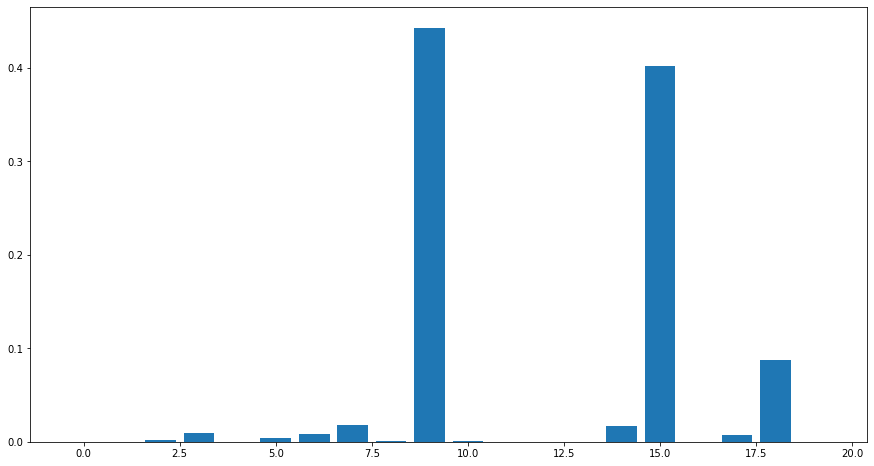

In [59]:
# plot
plt.subplots(figsize=(15,8))
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()

In [60]:
clf = XGBClassifier(params = params)  #initialise the model with optimum hyperparameters
clf.fit(X_train, y_train)

#print the evaluation score on the X_test by choosing the best evaluation metric
accuracy = sklearn.metrics.accuracy_score(y_test, predictions)
precision=sklearn.metrics.precision_score(y_test, predictions,average='macro')
recall=sklearn.metrics.recall_score(y_test, predictions, average='macro')
print("Accuracy: %.2f%% " % (accuracy * 100.0))
print("Precision: %.2f%% " % (precision *100))
print("Recall: %.2f%% " % (recall * 100))


[02:56:29] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:541: 
Parameters: { params } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[02:56:29] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 75.00% 
Precision: 21.43% 
Recall: 25.00% 


### Print the class distribution after applying SMOTE 

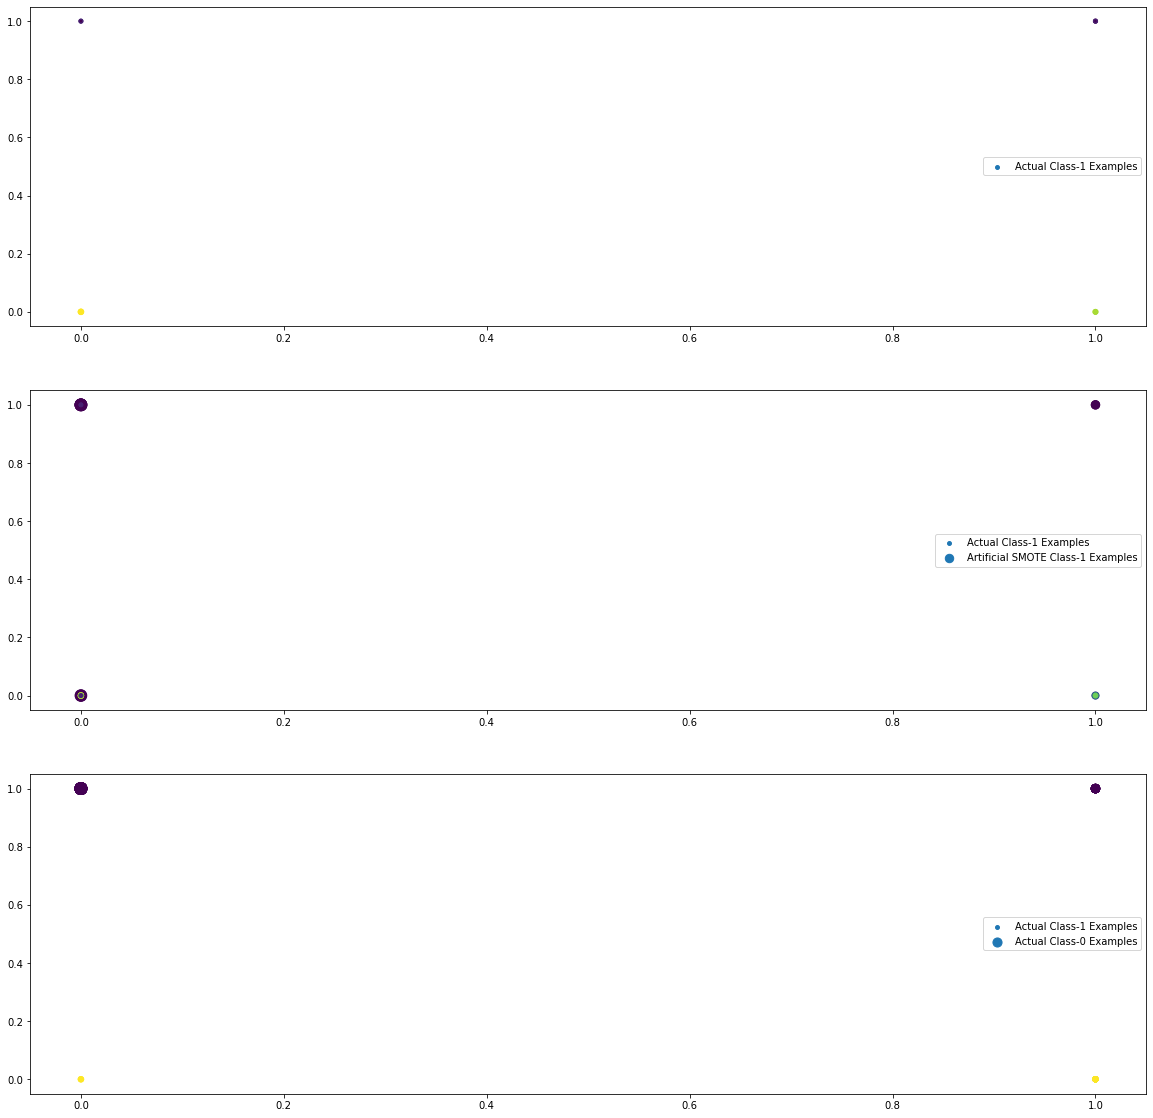

In [61]:
sm = over_sampling.SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]


X_train_3 = X_train.to_numpy()[np.where(y_train==3.0)]
X_train_2 = X_train.to_numpy()[np.where(y_train==2.0)]
X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()


plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], 
            X_train_1[:, 1],
            X_train_1[:, 2],
            X_train_1[:, 3], label='Actual Class-1 Examples')

plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], 
            X_train_1[:, 1],
            X_train_1[:, 2],
            X_train_1[:, 3], label='Actual Class-1 Examples')

plt.scatter(X_train_smote_1.iloc[:X_train_1.shape[0], 0],
            X_train_smote_1.iloc[:X_train_1.shape[0], 1],
            X_train_smote_1.iloc[:X_train_1.shape[0], 2],
            X_train_smote_1.iloc[:X_train_1.shape[0], 3],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], 
            X_train_1[:, 1],
            X_train_1[:, 2],
            X_train_1[:, 3],
            label='Actual Class-1 Examples')

plt.scatter(X_train_0[:X_train_1.shape[0], 0], 
            X_train_0[:X_train_1.shape[0], 1],
            X_train_0[:X_train_1.shape[0], 2],
            X_train_0[:X_train_1.shape[0], 3],
            label='Actual Class-0 Examples')
plt.legend()

### Build models on other algorithms to see the better performing on SMOTE

In [62]:
#perform cross validation & then balance classes on X_train_cv & y_train_cv using SMOTE

#perform hyperparameter tuning

#print the evaluation result by choosing a evaluation metric

#print the optimum value of hyperparameters
X_train_cv = X_train_smote
X_test_cv = X_test
y_train_cv = y_train_smote
y_test_cv = y_test

### Similarly explore other algorithms on balanced dataset by building models like:
- Decision Tree
- Random Forest
- XGBoost

# Decision Tree

In [64]:
# Importing decision tree classifier from sklearn library

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_train_cv, y_train_cv)

DecisionTreeClassifier(max_depth=5)

In [65]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics


# Making predictions
y_pred_default = dt_default.predict(X_test_cv)

# Printing classification report
print(classification_report(y_test_cv, y_pred_default))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.92      0.96        12
           2       0.00      0.00      0.00         2
           3       0.67      1.00      0.80         2

    accuracy                           0.81        16
   macro avg       0.42      0.48      0.44        16
weighted avg       0.83      0.81      0.82        16



In [66]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test_cv,y_pred_default))
print(accuracy_score(y_test_cv,y_pred_default))

[[ 0  0  0  0]
 [ 0 11  0  1]
 [ 2  0  0  0]
 [ 0  0  0  2]]
0.8125


In [67]:
# Putting features
features = list(dfTrace.columns[1:21])
features

['receipt_status',
 'Contract_is_erc20',
 'trace_from_address',
 'trace_to_address',
 'trace_value',
 'trace_gas',
 'trace_gas_used',
 'token_transfer_from_address',
 'token_transfer_to_address',
 'token_transfer_value',
 'transaction_from_address',
 'transaction_to_address',
 'transaction_value',
 'transaction_gas',
 'transaction_gas_price',
 'receipt_cumulative_gas_used',
 'receipt_gas_used',
 'token_decimals',
 'token_total_supply',
 'Contract_address']

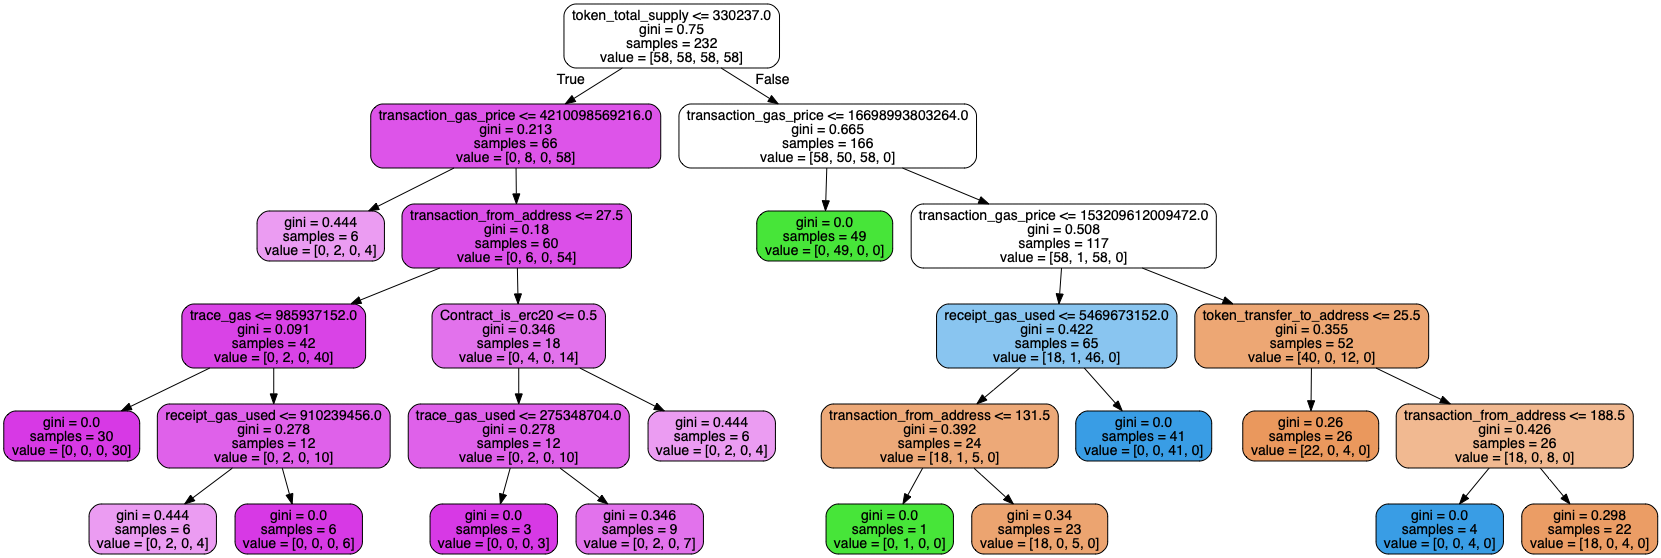

In [68]:
# plotting tree with max_depth=3

dot_data = StringIO()  
export_graphviz(dt_default, out_file=dot_data,
                feature_names=features, filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [69]:
# Tuning max_depth
# specify number of folds for k-fold CV
n_folds = StratifiedKFold(n_splits = 5, shuffle = False, random_state = None)

# parameters to build the model on
parameters = {'max_depth': range(1, 30)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = None)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score=True)
tree.fit(X_train_cv, y_train_cv)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 30)}, return_train_score=True,
             scoring='accuracy')

In [70]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.002859,0.000770,0.001684,0.000060,1,{'max_depth': 1},0.510638,0.489362,0.478261,0.500000,...,0.495652,0.010995,29,0.497297,0.502703,0.505376,0.500000,0.500000,0.501075,0.002747
1,0.002482,0.000090,0.001722,0.000159,2,{'max_depth': 2},0.723404,0.680851,0.739130,0.652174,...,0.685199,0.041175,28,0.789189,0.702703,0.704301,0.725806,0.731183,0.730636,0.031388
2,0.002556,0.000129,0.001704,0.000159,3,{'max_depth': 3},0.829787,0.744681,0.826087,0.760870,...,0.784459,0.036008,27,0.897297,0.789189,0.822581,0.849462,0.844086,0.840523,0.035420
3,0.002634,0.000095,0.001615,0.000063,4,{'max_depth': 4},0.829787,0.872340,0.891304,0.804348,...,0.844773,0.032041,26,0.918919,0.810811,0.876344,0.908602,0.892473,0.881430,0.038154
4,0.002661,0.000067,0.001684,0.000125,5,{'max_depth': 5},0.787234,0.893617,0.913043,0.826087,...,0.853562,0.045452,1,0.918919,0.875676,0.892473,0.924731,0.919355,0.906231,0.018965


<Figure size 1440x1440 with 0 Axes>

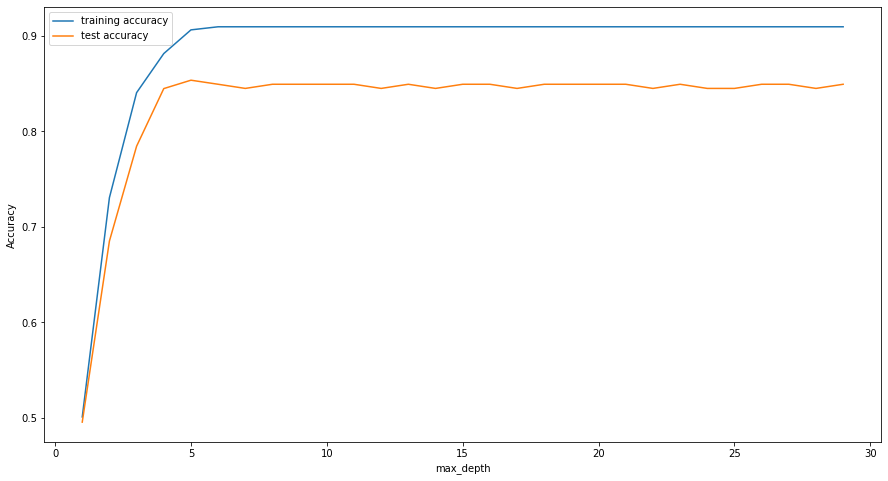

In [71]:
# plotting accuracies with max_depth
plt.figure()
plt.subplots(figsize=(15,8))
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [72]:
# Tuning min_samples_leaf
# specify number of folds for k-fold CV
n_folds = StratifiedKFold(n_splits = 5, shuffle = False, random_state = None)

# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score=True)
tree.fit(X_train_cv, y_train_cv)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'min_samples_leaf': range(5, 200, 20)},
             return_train_score=True, scoring='accuracy')

In [73]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003260,0.000465,0.001967,0.000291,5,{'min_samples_leaf': 5},0.872340,0.893617,0.934783,0.804348,...,0.866235,0.046750,1,0.897297,0.870270,0.876344,0.908602,0.892473,0.888997,0.013972
1,0.002803,0.000085,0.001652,0.000069,25,{'min_samples_leaf': 25},0.723404,0.893617,0.934783,0.717391,...,0.810361,0.088755,2,0.789189,0.848649,0.854839,0.865591,0.865591,0.844772,0.028540
2,0.002692,0.000075,0.001604,0.000021,45,{'min_samples_leaf': 45},0.765957,0.680851,0.739130,0.652174,...,0.706753,0.040808,3,0.702703,0.708108,0.709677,0.725806,0.811828,0.731625,0.040835
3,0.002670,0.000158,0.001639,0.000116,65,{'min_samples_leaf': 65},0.510638,0.489362,0.478261,0.478261,...,0.491304,0.012597,5,0.497297,0.502703,0.505376,0.500000,0.494624,0.500000,0.003806
4,0.002687,0.000147,0.001658,0.000072,85,{'min_samples_leaf': 85},0.510638,0.489362,0.478261,0.500000,...,0.495652,0.010995,4,0.497297,0.502703,0.505376,0.500000,0.494624,0.500000,0.003806


<Figure size 1440x1440 with 0 Axes>

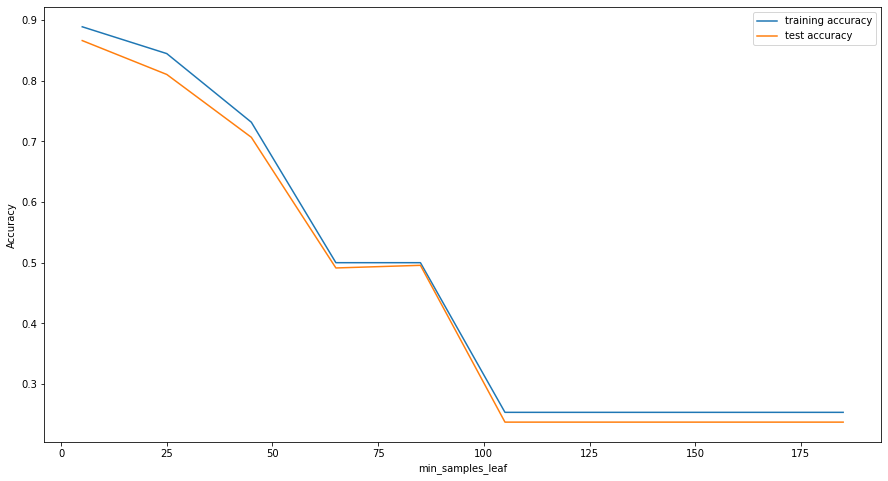

In [74]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.subplots(figsize=(15,8))
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [75]:
# Tuning min_samples_split
# GridSearchCV to find optimal min_samples_split

# specify number of folds for k-fold CV
n_folds = StratifiedKFold(n_splits = 5, shuffle = False, random_state = None)

# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
tree.fit(X_train_cv, y_train_cv)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'min_samples_split': range(5, 200, 20)},
             return_train_score=True, scoring='accuracy')

In [76]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003262,0.000339,0.001734,0.000108,5,{'min_samples_split': 5},0.744681,0.914894,0.913043,0.826087,...,0.849306,0.063011,2,0.918919,0.891892,0.892473,0.924731,0.919355,0.909474,0.014267
1,0.003004,0.000188,0.001639,0.000029,25,{'min_samples_split': 25},0.829787,0.893617,0.934783,0.804348,...,0.857724,0.048696,1,0.897297,0.870270,0.876344,0.908602,0.892473,0.888997,0.013972
2,0.002765,0.000078,0.001657,0.000080,45,{'min_samples_split': 45},0.765957,0.872340,0.934783,0.804348,...,0.840703,0.058265,3,0.843243,0.805405,0.876344,0.908602,0.892473,0.865214,0.036903
3,0.002889,0.000172,0.001702,0.000112,65,{'min_samples_split': 65},0.723404,0.872340,0.869565,0.760870,...,0.797410,0.061593,4,0.789189,0.805405,0.822581,0.849462,0.844086,0.822145,0.022778
4,0.002792,0.000263,0.001649,0.000047,85,{'min_samples_split': 85},0.765957,0.744681,0.869565,0.760870,...,0.780389,0.045161,5,0.702703,0.789189,0.822581,0.849462,0.844086,0.801604,0.053797


<Figure size 1440x1440 with 0 Axes>

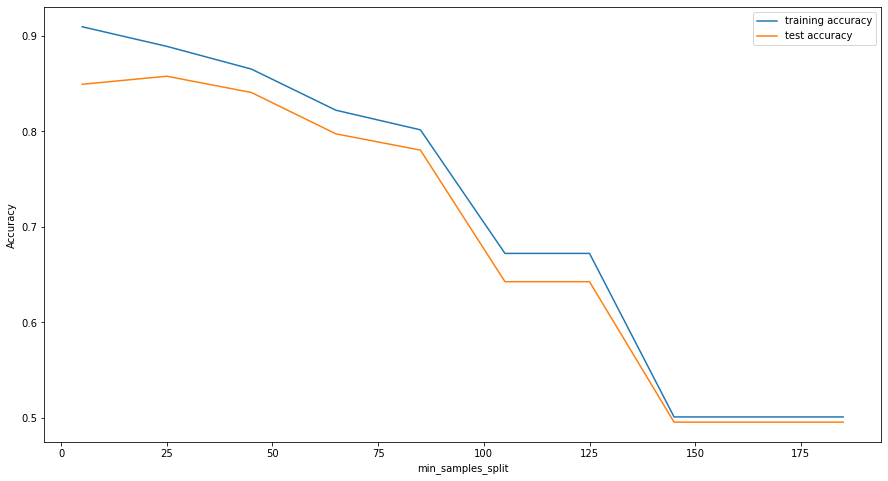

In [78]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.subplots(figsize=(15,8))
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [82]:
# Grid Search to Find Optimal Hyperparameters
# Create the parameter grid 
param_grid = {
    'max_depth': range(1,10),
    'min_samples_leaf': range(1,80),
    'min_samples_split': range(1,150),
    'criterion': ["entropy", "gini"]
}

n_folds = StratifiedKFold(n_splits = 5, shuffle = False, random_state = None)

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1, return_train_score=True)

# Fit the grid search to the data
grid_search.fit(X_train_cv,y_train_cv)

Fitting 5 folds for each of 211878 candidates, totalling 1059390 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1059390 out of 1059390 | elapsed: 76.7min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 80),
                         'min_samples_split': range(1, 150)},
             return_train_score=True, verbose=1)

In [83]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.002777,0.001261,0.000000,0.000000,entropy,1,1,1,"{'criterion': 'entropy', 'max_depth': 1, 'min_...",NaN,...,NaN,NaN,211878,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.002508,0.000171,0.001630,0.000032,entropy,1,1,2,"{'criterion': 'entropy', 'max_depth': 1, 'min_...",0.510638,...,0.491304,0.012597,114001,0.497297,0.502703,0.505376,0.5,0.494624,0.5,0.003806
2,0.003219,0.000634,0.002103,0.000563,entropy,1,1,3,"{'criterion': 'entropy', 'max_depth': 1, 'min_...",0.510638,...,0.491304,0.012597,114001,0.497297,0.502703,0.505376,0.5,0.494624,0.5,0.003806
3,0.002703,0.000381,0.001784,0.000143,entropy,1,1,4,"{'criterion': 'entropy', 'max_depth': 1, 'min_...",0.510638,...,0.491304,0.012597,114001,0.497297,0.502703,0.505376,0.5,0.494624,0.5,0.003806
4,0.002391,0.000110,0.001636,0.000096,entropy,1,1,5,"{'criterion': 'entropy', 'max_depth': 1, 'min_...",0.510638,...,0.491304,0.012597,114001,0.497297,0.502703,0.505376,0.5,0.494624,0.5,0.003806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211873,0.001665,0.000068,0.001195,0.000051,gini,9,79,145,"{'criterion': 'gini', 'max_depth': 9, 'min_sam...",0.510638,...,0.491304,0.012597,114001,0.497297,0.502703,0.505376,0.5,0.494624,0.5,0.003806
211874,0.001643,0.000065,0.001174,0.000057,gini,9,79,146,"{'criterion': 'gini', 'max_depth': 9, 'min_sam...",0.510638,...,0.491304,0.012597,114001,0.497297,0.502703,0.505376,0.5,0.494624,0.5,0.003806
211875,0.001646,0.000064,0.001177,0.000048,gini,9,79,147,"{'criterion': 'gini', 'max_depth': 9, 'min_sam...",0.510638,...,0.491304,0.012597,114001,0.497297,0.502703,0.505376,0.5,0.494624,0.5,0.003806
211876,0.001666,0.000062,0.001192,0.000056,gini,9,79,148,"{'criterion': 'gini', 'max_depth': 9, 'min_sam...",0.510638,...,0.491304,0.012597,114001,0.497297,0.502703,0.505376,0.5,0.494624,0.5,0.003806


In [84]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.8793709528214617
DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=18)


In [92]:
#tree with max_depth = 5
clf_gini = DecisionTreeClassifier(criterion = "entropy", 
                                  random_state = 100,
                                  max_depth=5, 
                                  min_samples_leaf=10,
                                  min_samples_split=18)
clf_gini.fit(X_train_cv, y_train_cv)

# score
print(clf_gini.score(X_test_cv,y_test_cv))

0.8125


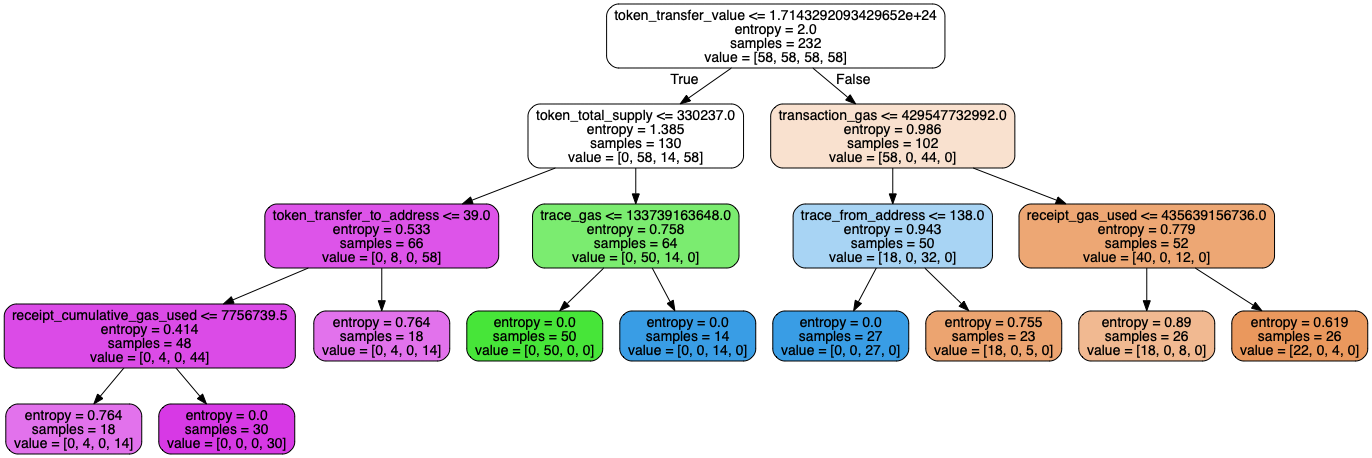

In [93]:
# plotting the tree
dot_data = StringIO()  
export_graphviz(clf_gini, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [94]:
# classification metrics
y_pred = clf_gini.predict(X_test_cv)
print(classification_report(y_test_cv, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.92      0.96        12
           2       0.00      0.00      0.00         2
           3       0.67      1.00      0.80         2

    accuracy                           0.81        16
   macro avg       0.42      0.48      0.44        16
weighted avg       0.83      0.81      0.82        16



In [95]:
# confusion matrix
print(confusion_matrix(y_test_cv,y_pred))

[[ 0  0  0  0]
 [ 0 11  0  1]
 [ 2  0  0  0]
 [ 0  0  0  2]]


# Random Forest

In [96]:
# Running the random forest with default parameters.
rfc = RandomForestClassifier()

# fit
rfc.fit(X_train_cv,y_train_cv)

RandomForestClassifier()

In [97]:
# Making predictions
predictions = rfc.predict(X_test_cv)

In [98]:
# Let's check the report of our default model
print(classification_report(y_test_cv,predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.92      0.96        12
           2       0.00      0.00      0.00         2
           3       0.67      1.00      0.80         2

    accuracy                           0.81        16
   macro avg       0.42      0.48      0.44        16
weighted avg       0.83      0.81      0.82        16



In [99]:
# Printing confusion matrix
print(confusion_matrix(y_test_cv,predictions))

[[ 0  0  0  0]
 [ 0 11  0  1]
 [ 2  0  0  0]
 [ 0  0  0  2]]


In [100]:
print(accuracy_score(y_test_cv,predictions))

0.8125


In [102]:
# Tuning max_features

# specify number of folds for k-fold CV
n_folds = StratifiedKFold(n_splits = 5, shuffle = False, random_state = None)

# parameters to build the model on
parameters = {'max_features': [2,4,6,8,10,12,14,16,18,20]}

# instantiate the model
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", 
                  return_train_score=True)

rf.fit(X_train_cv, y_train_cv)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(max_depth=4),
             param_grid={'max_features': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]},
             return_train_score=True, scoring='accuracy')

In [103]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.101157,0.018385,0.007952,0.001472,2,{'max_features': 2},0.872340,0.978723,0.956522,0.826087,...,0.896300,0.060455,1,0.908108,0.891892,0.892473,0.919355,0.913978,0.905161,0.011180
1,0.100468,0.009259,0.008477,0.001444,4,{'max_features': 4},0.808511,0.978723,0.956522,0.826087,...,0.879186,0.072832,3,0.913514,0.886486,0.887097,0.919355,0.913978,0.904086,0.014271
2,0.098699,0.009302,0.008315,0.001501,6,{'max_features': 6},0.808511,0.978723,0.956522,0.826087,...,0.879186,0.072832,3,0.908108,0.891892,0.892473,0.924731,0.908602,0.905161,0.012170
3,0.133479,0.001046,0.010688,0.000302,8,{'max_features': 8},0.808511,0.978723,0.956522,0.804348,...,0.874838,0.076432,6,0.913514,0.891892,0.892473,0.913978,0.913978,0.905167,0.010605
4,0.119938,0.011647,0.009709,0.000578,10,{'max_features': 10},0.808511,0.978723,0.956522,0.826087,...,0.883534,0.070131,2,0.918919,0.886486,0.892473,0.919355,0.919355,0.907318,0.014688


<Figure size 1440x1440 with 0 Axes>

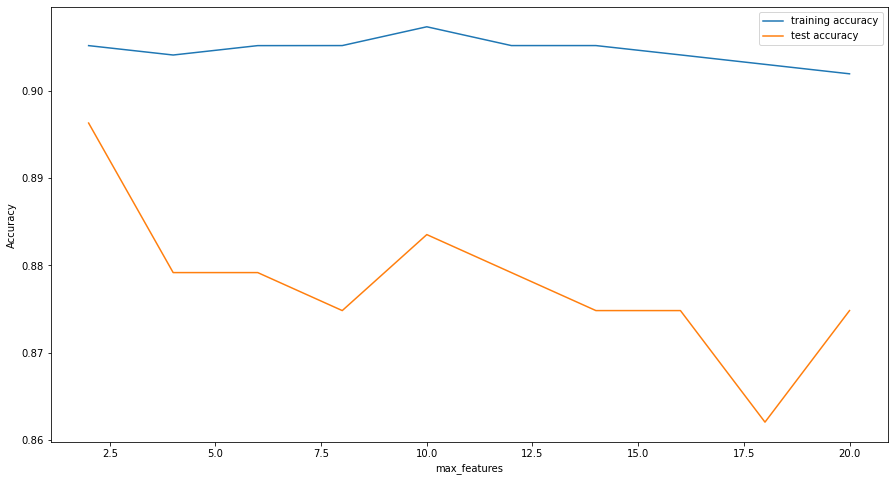

In [104]:
# plotting accuracies with max_features
plt.figure()
plt.subplots(figsize=(15,8))
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [105]:
# Tuning min_samples_leaf
# GridSearchCV to find optimal min_samples_leaf
# specify number of folds for k-fold CV
n_folds = StratifiedKFold(n_splits = 5, shuffle = False, random_state = None)

# parameters to build the model on
parameters = {'min_samples_leaf': range(1,50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", 
                  return_train_score=True)

rf.fit(X_train_cv, y_train_cv)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(),
             param_grid={'min_samples_leaf': range(1, 50)},
             return_train_score=True, scoring='accuracy')

In [106]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.115448,0.014761,0.008767,0.001381,1,{'min_samples_leaf': 1},0.765957,0.978723,0.956522,0.826087,...,0.875023,0.080530,3,0.918919,0.891892,0.892473,0.924731,0.919355,0.909474,0.014267
1,0.103600,0.014305,0.008700,0.001310,2,{'min_samples_leaf': 2},0.808511,0.978723,0.956522,0.826087,...,0.883534,0.070131,1,0.913514,0.891892,0.892473,0.924731,0.913978,0.907318,0.012995
2,0.095529,0.007410,0.007837,0.000825,3,{'min_samples_leaf': 3},0.808511,0.978723,0.934783,0.826087,...,0.879186,0.066025,2,0.913514,0.891892,0.881720,0.924731,0.913978,0.905167,0.015850
3,0.090369,0.001684,0.007397,0.000744,4,{'min_samples_leaf': 4},0.808511,0.978723,0.934783,0.804348,...,0.874838,0.069976,4,0.913514,0.886486,0.876344,0.908602,0.908602,0.898710,0.014591
4,0.092094,0.001535,0.007591,0.000673,5,{'min_samples_leaf': 5},0.808511,0.978723,0.934783,0.804348,...,0.870490,0.072161,7,0.891892,0.881081,0.876344,0.908602,0.908602,0.893304,0.013469


<Figure size 1440x1440 with 0 Axes>

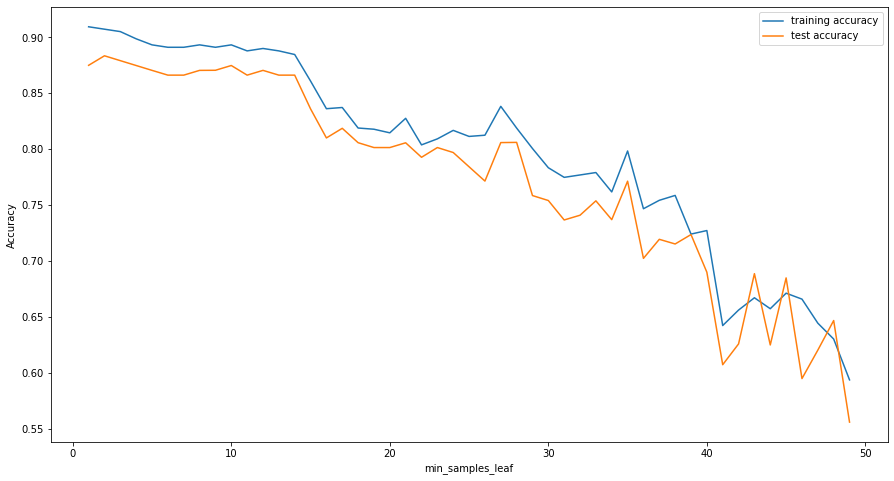

In [107]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.subplots(figsize=(15,8))
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [108]:
# Tuning min_samples_split
# GridSearchCV to find optimal min_samples_split
# specify number of folds for k-fold CV
n_folds = StratifiedKFold(n_splits = 5, shuffle = False, random_state = None)

# parameters to build the model on
parameters = {'min_samples_split': range(1, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", 
                  return_train_score=True)

rf.fit(X_train_cv, y_train_cv)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(),
             param_grid={'min_samples_split': range(1, 50)},
             return_train_score=True, scoring='accuracy')

In [109]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.039775,0.001158,0.000000,0.000000,1,{'min_samples_split': 1},NaN,NaN,NaN,NaN,...,NaN,NaN,49,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.114156,0.014550,0.009093,0.001321,2,{'min_samples_split': 2},0.872340,0.978723,0.913043,0.826087,...,0.887604,0.053944,5,0.918919,0.891892,0.892473,0.924731,0.919355,0.909474,0.014267
2,0.114570,0.015367,0.009254,0.001709,3,{'min_samples_split': 3},0.765957,0.978723,0.913043,0.826087,...,0.866327,0.073282,22,0.918919,0.891892,0.892473,0.924731,0.919355,0.909474,0.014267
3,0.101755,0.009825,0.008055,0.001013,4,{'min_samples_split': 4},0.829787,0.978723,0.956522,0.826087,...,0.887789,0.065972,3,0.918919,0.891892,0.892473,0.924731,0.919355,0.909474,0.014267
4,0.114502,0.019343,0.009560,0.001805,5,{'min_samples_split': 5},0.765957,0.978723,0.956522,0.826087,...,0.875023,0.080530,14,0.918919,0.891892,0.892473,0.924731,0.919355,0.909474,0.014267


<Figure size 1440x1440 with 0 Axes>

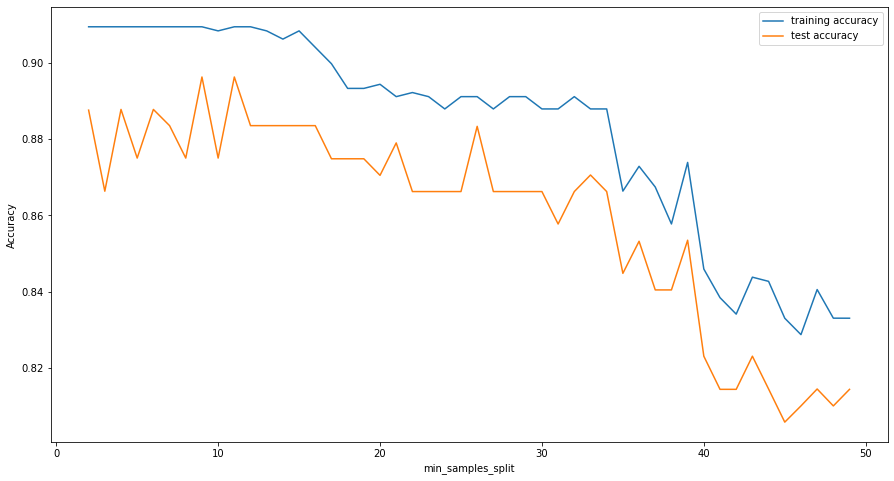

In [110]:
# plotting accuracies with min_samples_split
plt.figure()
plt.subplots(figsize=(15,8))
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [111]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [1,2,3,4,5],
    'min_samples_leaf': range(1,35),
    'min_samples_split': range(1,50),
    'n_estimators': [100,200, 300], 
    'max_features': [5,10,15,20]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1, return_train_score=True)

In [112]:
# Fit the grid search to the data
grid_search.fit(X_train_cv, y_train_cv)

Fitting 3 folds for each of 99960 candidates, totalling 299880 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   23.1s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:   42.0s
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 2426 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 3176 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 4026 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 4976 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 6026 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 7176 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 8426 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done 9776 tasks      | elapsed: 12.0min
[Parallel(n_jobs=-1)]: Done 11226 tasks      

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'max_features': [5, 10, 15, 20],
                         'min_samples_leaf': range(1, 35),
                         'min_samples_split': range(1, 50),
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, verbose=1)

In [113]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8964923964923965 using {'max_depth': 5, 'max_features': 5, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 200}


In [114]:
# Fitting the final model with the best parameters obtained from grid search.
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=1, 
                             min_samples_split=4,
                             max_features=5,
                             n_estimators=200)

In [115]:
rfc.fit(X_train_cv,y_train_cv)

RandomForestClassifier(max_depth=5, max_features=5, min_samples_split=4,
                       n_estimators=200)

In [116]:
# evaluation metrics
print(classification_report(y_test_cv,predictions))
print(confusion_matrix(y_test_cv,predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.92      0.96        12
           2       0.00      0.00      0.00         2
           3       0.67      1.00      0.80         2

    accuracy                           0.81        16
   macro avg       0.42      0.48      0.44        16
weighted avg       0.83      0.81      0.82        16

[[ 0  0  0  0]
 [ 0 11  0  1]
 [ 2  0  0  0]
 [ 0  0  0  2]]


# XGBoost

In [117]:
# Fitting the decision tree with default hyperparameters, apart from
model = XGBClassifier()
model.fit(X_train_cv, y_train_cv)

[18:48:50] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

[18:50:09] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:50:09] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:50:09] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:50:10] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1

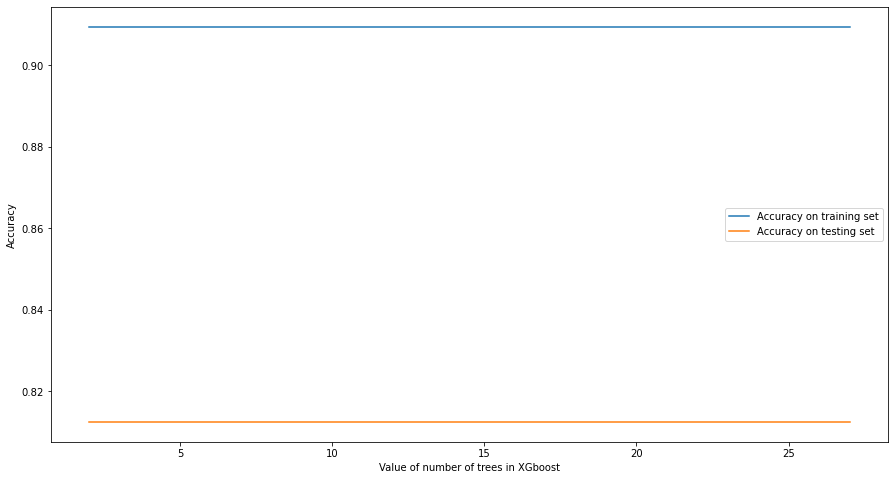

In [119]:
tree_range = range(2, 30, 5)
score1=[]
score2=[]
for tree in tree_range:
    xgb=XGBClassifier(n_estimators=tree)
    xgb.fit(X_train_cv,y_train_cv)
    score1.append(xgb.score(X_train_cv,y_train_cv))
    score2.append(xgb.score(X_test_cv,y_test_cv))
    
%matplotlib inline
plt.subplots(figsize=(15,8))
plt.plot(tree_range,score1,label= 'Accuracy on training set')
plt.plot(tree_range,score2,label= 'Accuracy on testing set')
plt.xlabel('Value of number of trees in XGboost')
plt.ylabel('Accuracy')
plt.legend()

In [120]:
# make predictions for test data
# use predict_proba since we need probabilities to compute auc
y_pred = model.predict_proba(X_test_cv)
y_pred[:10]

array([[3.0640807e-04, 9.9871683e-01, 2.6577158e-04, 7.1103580e-04],
       [8.4161282e-01, 1.4313352e-03, 1.5548015e-01, 1.4757210e-03],
       [3.8243443e-04, 9.9766749e-01, 1.0625488e-03, 8.8745885e-04],
       [3.0640807e-04, 9.9871683e-01, 2.6577158e-04, 7.1103580e-04],
       [3.5393937e-04, 9.9851769e-01, 3.0699919e-04, 8.2133466e-04],
       [4.2006872e-03, 3.2659987e-01, 3.6435833e-03, 6.6555583e-01],
       [3.0640807e-04, 9.9871683e-01, 2.6577158e-04, 7.1103580e-04],
       [6.0865592e-04, 9.9847466e-01, 5.2793464e-04, 3.8871777e-04],
       [3.8243443e-04, 9.9766749e-01, 1.0625488e-03, 8.8745885e-04],
       [8.4161282e-01, 1.4313352e-03, 1.5548015e-01, 1.4757210e-03]],
      dtype=float32)

In [121]:
sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=model.predict(X_test)
)

print(sk_report)

              precision    recall  f1-score   support

           0   0.000000  0.000000  0.000000         0
           1   1.000000  0.916667  0.956522        12
           2   0.000000  0.000000  0.000000         2
           3   0.666667  1.000000  0.800000         2

    accuracy                       0.812500        16
   macro avg   0.416667  0.479167  0.439130        16
weighted avg   0.833333  0.812500  0.817391        16



In [124]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = StratifiedKFold(n_splits = 5, shuffle = False, random_state = None)

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          

# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)    

In [125]:
# fit the model
model_cv.fit(X_train_cv, y_train_cv)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[18:52:33] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[18:52:33] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:52:33] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:52:33] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:52:33] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1

[18:52:38] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:52:38] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    5.4s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=2, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=200, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=Non

In [126]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.155239,0.093570,0.001960,0.000107,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.787234,0.978723,0.978261,...,0.883626,0.079854,1,0.918919,0.886486,0.892473,0.924731,0.919355,0.908393,0.015692
1,0.212324,0.122370,0.002178,0.000264,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.744681,0.978723,0.978261,...,0.875116,0.091143,3,0.918919,0.891892,0.892473,0.924731,0.919355,0.909474,0.014267
2,0.136871,0.022697,0.002050,0.000127,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.723404,0.978723,0.934783,...,0.862165,0.089018,6,0.918919,0.891892,0.892473,0.924731,0.919355,0.909474,0.014267
3,0.174064,0.130154,0.002044,0.000194,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.723404,0.978723,0.956522,...,0.866512,0.092905,4,0.918919,0.891892,0.892473,0.924731,0.919355,0.909474,0.014267
4,0.192836,0.132092,0.002117,0.000061,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.787234,0.978723,0.956522,...,0.879278,0.075029,2,0.918919,0.891892,0.892473,0.924731,0.919355,0.909474,0.014267
5,0.185837,0.081016,0.002333,0.000282,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.765957,0.978723,0.913043,...,0.866327,0.073282,5,0.918919,0.891892,0.892473,0.924731,0.919355,0.909474,0.014267


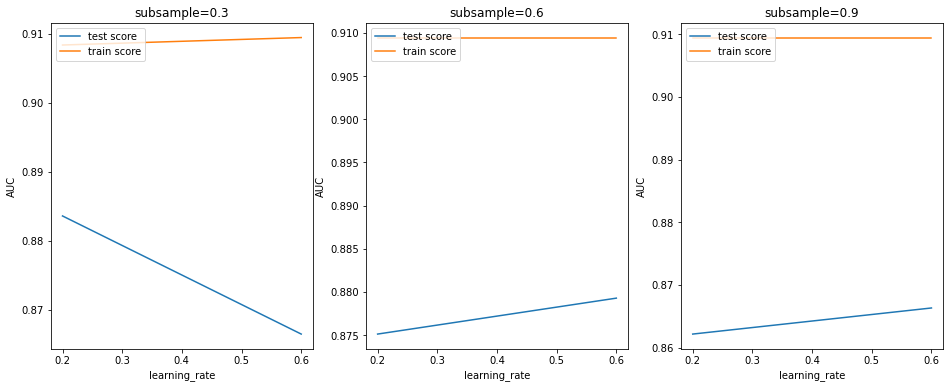

In [127]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    #plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    #plt.xscale('log')

In [128]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for auc

#The results show that a subsample size of 0.6 and learning_rate of about 0.2 seems optimal.
#Also, XGBoost has resulted in the highest ROC AUC obtained (across various hyperparameters).

params = {'learning_rate': 0.2,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
model = XGBClassifier(params = params)
model.fit(X_train_cv, y_train_cv)

[18:53:52] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:541: 
Parameters: { params } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:53:52] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1,
              objective='multi:softprob',
              params={'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [129]:
y_pred = model.predict_proba(X_test_cv)
y_pred[:10]

array([[3.0640807e-04, 9.9871683e-01, 2.6577158e-04, 7.1103580e-04],
       [8.4161282e-01, 1.4313352e-03, 1.5548015e-01, 1.4757210e-03],
       [3.8243443e-04, 9.9766749e-01, 1.0625488e-03, 8.8745885e-04],
       [3.0640807e-04, 9.9871683e-01, 2.6577158e-04, 7.1103580e-04],
       [3.5393937e-04, 9.9851769e-01, 3.0699919e-04, 8.2133466e-04],
       [4.2006872e-03, 3.2659987e-01, 3.6435833e-03, 6.6555583e-01],
       [3.0640807e-04, 9.9871683e-01, 2.6577158e-04, 7.1103580e-04],
       [6.0865592e-04, 9.9847466e-01, 5.2793464e-04, 3.8871777e-04],
       [3.8243443e-04, 9.9766749e-01, 1.0625488e-03, 8.8745885e-04],
       [8.4161282e-01, 1.4313352e-03, 1.5548015e-01, 1.4757210e-03]],
      dtype=float32)

In [131]:
sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=model.predict(X_test)
)

print(sk_report)

              precision    recall  f1-score   support

           0   0.000000  0.000000  0.000000         0
           1   1.000000  0.916667  0.956522        12
           2   0.000000  0.000000  0.000000         2
           3   0.666667  1.000000  0.800000         2

    accuracy                       0.812500        16
   macro avg   0.416667  0.479167  0.439130        16
weighted avg   0.833333  0.812500  0.817391        16



In [132]:
# feature importance
importance = dict(zip(X_train_cv.columns, model.feature_importances_))
importance

{'receipt_status': 0.012432858,
 'Contract_is_erc20': 0.018013002,
 'trace_from_address': 0.01447751,
 'trace_to_address': 0.0019275363,
 'trace_value': 0.0005061291,
 'trace_gas': 0.08901089,
 'trace_gas_used': 0.0010209174,
 'token_transfer_from_address': 0.012083654,
 'token_transfer_to_address': 0.028738448,
 'token_transfer_value': 0.04209959,
 'transaction_from_address': 0.049653035,
 'transaction_to_address': 0.012421766,
 'transaction_value': 0.00022025249,
 'transaction_gas': 0.048128437,
 'transaction_gas_price': 0.02117698,
 'receipt_cumulative_gas_used': 0.0126980385,
 'receipt_gas_used': 0.09092274,
 'token_decimals': 0.29722258,
 'token_total_supply': 0.24567042,
 'Contract_address': 0.00157512}

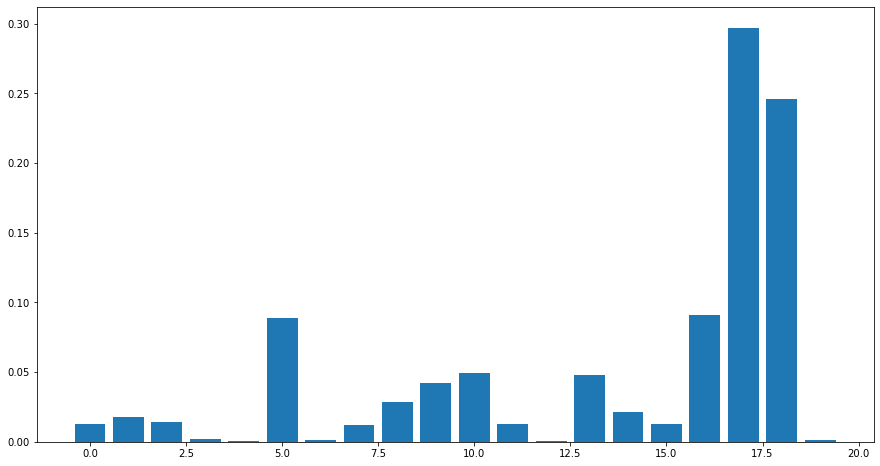

In [133]:
# plot
plt.subplots(figsize=(15,8))
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()

#### Proceed with the model which shows the best result 
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [142]:

clf = XGBClassifier(params = params)  #initialise the model with optimum hyperparameters
clf.fit(X_train, y_train)

#print the evaluation score on the X_test by choosing the best evaluation metric
accuracy = sklearn.metrics.accuracy_score(y_test, predictions)
precision=sklearn.metrics.precision_score(y_test, predictions,average='macro')
recall=sklearn.metrics.recall_score(y_test, predictions, average='macro')
print("Accuracy: %.2f%% " % (accuracy * 100.0))
print("Precision: %.2f%% " % (precision *100))
print("Recall: %.2f%% " % (recall * 100))


[19:01:12] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:541: 
Parameters: { params } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:01:12] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 81.25% 
Precision: 41.67% 
Recall: 47.92% 


# ADASYN

### Print the class distribution after applying ADASYN

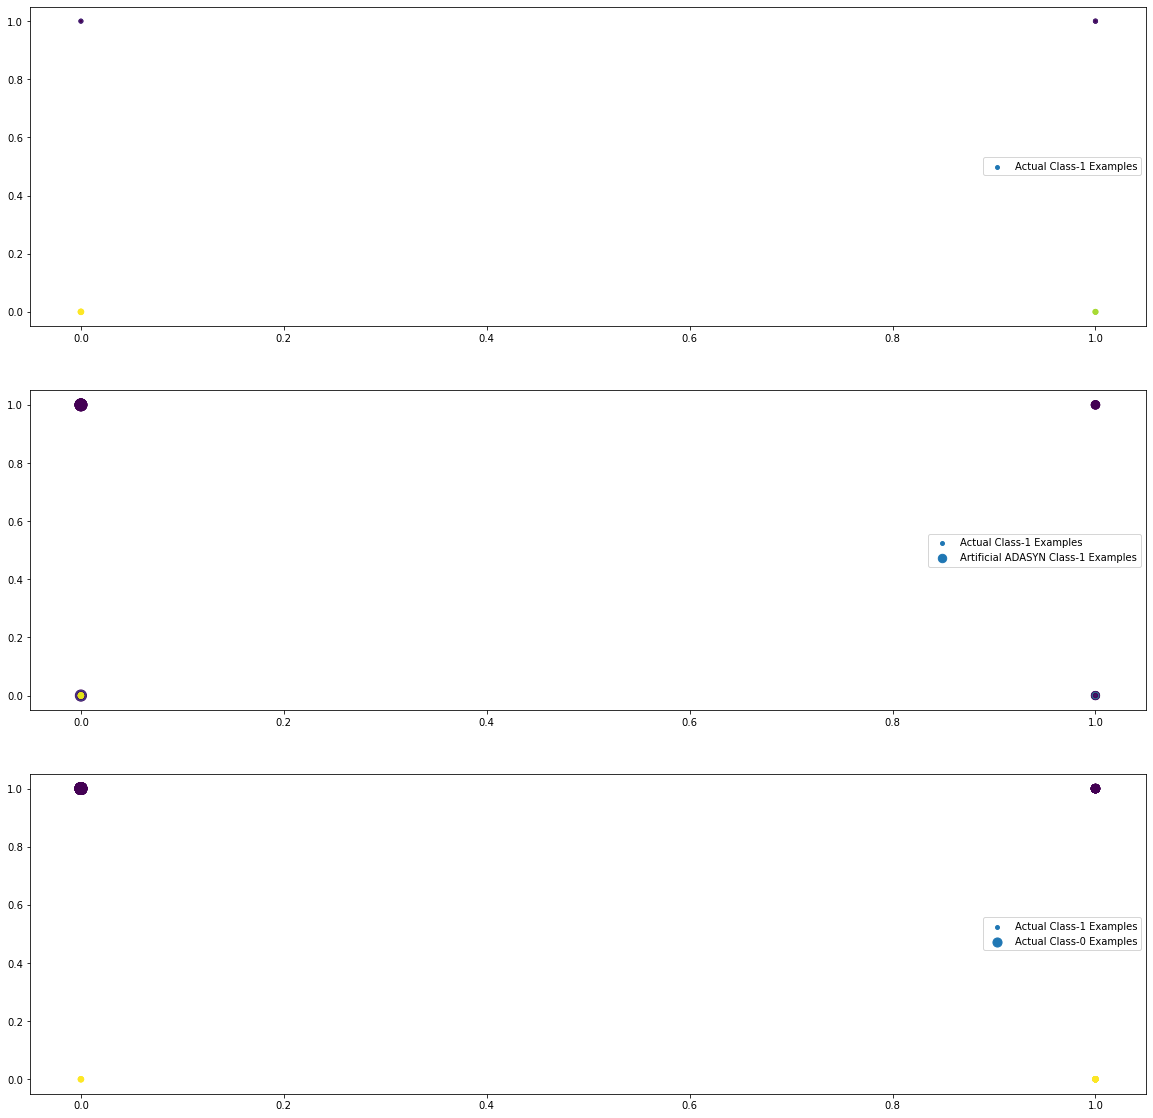

In [144]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_3 = X_train.to_numpy()[np.where(y_train==3.0)]
X_train_2 = X_train.to_numpy()[np.where(y_train==2.0)]
X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], 
            X_train_1[:, 1], 
            X_train_1[:, 2],
            X_train_1[:, 3],
            label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], 
            X_train_1[:, 1],
            X_train_1[:, 2],
            X_train_1[:, 3],
            label='Actual Class-1 Examples')

plt.scatter(X_train_adasyn_1.iloc[:X_train_1.shape[0], 0], 
            X_train_adasyn_1.iloc[:X_train_1.shape[0], 1],
            X_train_adasyn_1.iloc[:X_train_1.shape[0], 2],
            X_train_adasyn_1.iloc[:X_train_1.shape[0], 3],
            label='Artificial ADASYN Class-1 Examples')

plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], 
            X_train_1[:, 1], 
            X_train_1[:, 2],
            X_train_1[:, 3],
            label='Actual Class-1 Examples')

plt.scatter(X_train_0[:X_train_1.shape[0], 0], 
            X_train_0[:X_train_1.shape[0], 1], 
            X_train_0[:X_train_1.shape[0], 2], 
            X_train_0[:X_train_1.shape[0], 3], 
            label='Actual Class-0 Examples')
plt.legend()


In [145]:
#perform cross validation & then balance classes on X_train_cv & y_train_cv using SMOTE

#perform hyperparameter tuning

#print the evaluation result by choosing a evaluation metric

#print the optimum value of hyperparameters
X_train_cv = X_train_adasyn
X_test_cv = X_test
y_train_cv = y_train_adasyn
y_test_cv = y_test

### Similarly explore other algorithms on balanced dataset by building models like:
- Decision Tree
- Random Forest
- XGBoost

In [146]:
# Importing decision tree classifier from sklearn library

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_train_cv, y_train_cv)


DecisionTreeClassifier(max_depth=5)

In [147]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics


# Making predictions
y_pred_default = dt_default.predict(X_test_cv)

# Printing classification report
print(classification_report(y_test_cv, y_pred_default))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.92      0.96        12
           2       0.00      0.00      0.00         2
           3       0.67      1.00      0.80         2

    accuracy                           0.81        16
   macro avg       0.42      0.48      0.44        16
weighted avg       0.83      0.81      0.82        16



In [148]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test_cv,y_pred_default))
print(accuracy_score(y_test_cv,y_pred_default))

[[ 0  0  0  0]
 [ 0 11  0  1]
 [ 2  0  0  0]
 [ 0  0  0  2]]
0.8125


In [150]:
# Putting features
features = list(dfTrace.columns[1:21])
features

['receipt_status',
 'Contract_is_erc20',
 'trace_from_address',
 'trace_to_address',
 'trace_value',
 'trace_gas',
 'trace_gas_used',
 'token_transfer_from_address',
 'token_transfer_to_address',
 'token_transfer_value',
 'transaction_from_address',
 'transaction_to_address',
 'transaction_value',
 'transaction_gas',
 'transaction_gas_price',
 'receipt_cumulative_gas_used',
 'receipt_gas_used',
 'token_decimals',
 'token_total_supply',
 'Contract_address']

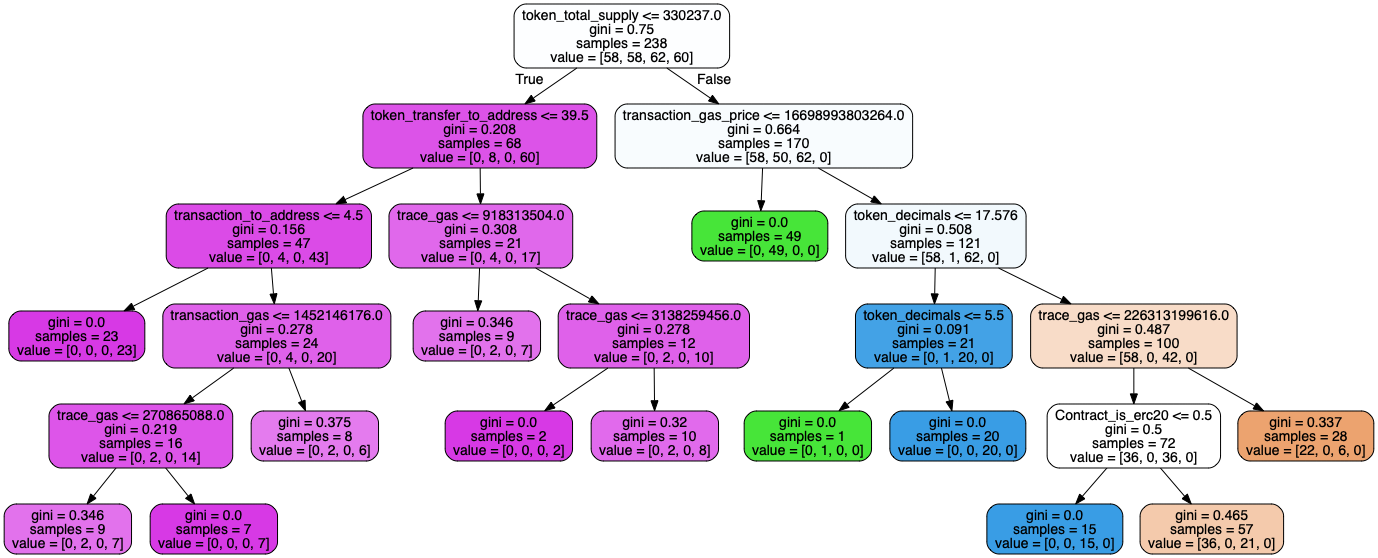

In [151]:
# plotting tree with max_depth=3

dot_data = StringIO()  
export_graphviz(dt_default, out_file=dot_data,
                feature_names=features, filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [152]:
# Tuning max_depth
# specify number of folds for k-fold CV
n_folds = StratifiedKFold(n_splits = 5, shuffle = False, random_state = None)

# parameters to build the model on
parameters = {'max_depth': range(1, 30)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = None)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score=True)
tree.fit(X_train_cv, y_train_cv)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 30)}, return_train_score=True,
             scoring='accuracy')

In [153]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.002793,0.000729,0.001709,0.000096,1,{'max_depth': 1},0.500000,0.520833,0.520833,0.510638,...,0.512589,0.007772,29,0.494737,0.510526,0.510526,0.513089,0.513089,0.508393,0.006924
1,0.002361,0.000022,0.001579,0.000013,2,{'max_depth': 2},0.604167,0.708333,0.770833,0.659574,...,0.676241,0.058120,28,0.752632,0.705263,0.705263,0.732984,0.738220,0.726872,0.018781
2,0.002419,0.000022,0.001585,0.000014,3,{'max_depth': 3},0.708333,0.666667,0.729167,0.744681,...,0.714450,0.026576,27,0.847368,0.800000,0.800000,0.795812,0.801047,0.808845,0.019345
3,0.002395,0.000059,0.001580,0.000110,4,{'max_depth': 4},0.708333,0.666667,0.729167,0.744681,...,0.739982,0.061408,26,0.852632,0.805263,0.805263,0.795812,0.832461,0.818286,0.021094
4,0.002503,0.000043,0.001601,0.000045,5,{'max_depth': 5},0.729167,0.833333,0.895833,0.808511,...,0.815071,0.053520,25,0.910526,0.847368,0.842105,0.848168,0.848168,0.859267,0.025729


<Figure size 1440x1440 with 0 Axes>

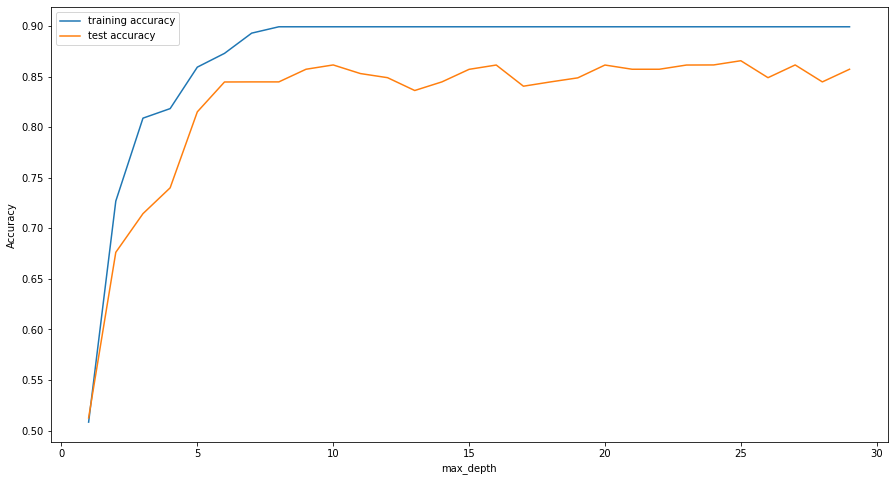

In [154]:
# plotting accuracies with max_depth
plt.figure()
plt.subplots(figsize=(15,8))
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [155]:
# Tuning min_samples_leaf
# specify number of folds for k-fold CV
n_folds = StratifiedKFold(n_splits = 5, shuffle = False, random_state = None)

# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score=True)
tree.fit(X_train_cv, y_train_cv)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'min_samples_leaf': range(5, 200, 20)},
             return_train_score=True, scoring='accuracy')

In [156]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003119,0.000262,0.001663,0.000090,5,{'min_samples_leaf': 5},0.791667,0.854167,0.916667,0.829787,...,0.857181,0.044537,1,0.905263,0.884211,0.889474,0.900524,0.895288,0.894952,0.007522
1,0.002683,0.000022,0.001605,0.000019,25,{'min_samples_leaf': 25},0.708333,0.729167,0.812500,0.702128,...,0.747872,0.044118,2,0.757895,0.836842,0.842105,0.816754,0.816754,0.814070,0.029915
2,0.002645,0.000033,0.001604,0.000022,45,{'min_samples_leaf': 45},0.729167,0.666667,0.729167,0.702128,...,0.718617,0.032968,3,0.705263,0.694737,0.694737,0.801047,0.759162,0.730989,0.042408
3,0.002487,0.000030,0.001567,0.000032,65,{'min_samples_leaf': 65},0.500000,0.479167,0.479167,0.510638,...,0.470390,0.045368,4,0.494737,0.500000,0.500000,0.492147,0.497382,0.496853,0.003057
4,0.002448,0.000048,0.001540,0.000021,85,{'min_samples_leaf': 85},0.500000,0.479167,0.479167,0.510638,...,0.470390,0.045368,4,0.494737,0.500000,0.500000,0.492147,0.497382,0.496853,0.003057


<Figure size 1440x1440 with 0 Axes>

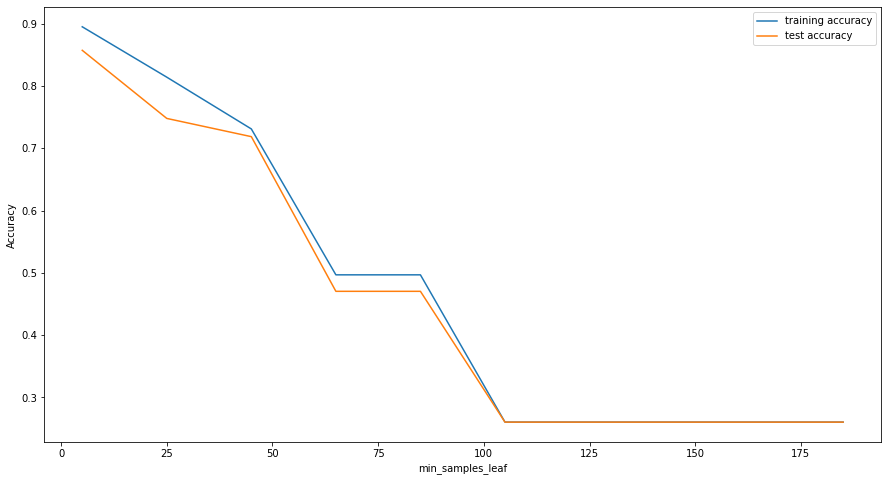

In [158]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.subplots(figsize=(15,8))
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [159]:
# Tuning min_samples_split
# GridSearchCV to find optimal min_samples_split

# specify number of folds for k-fold CV
n_folds = StratifiedKFold(n_splits = 5, shuffle = False, random_state = None)

# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
tree.fit(X_train_cv, y_train_cv)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'min_samples_split': range(5, 200, 20)},
             return_train_score=True, scoring='accuracy')

In [160]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003108,0.000395,0.001658,0.000080,5,{'min_samples_split': 5},0.791667,0.854167,0.916667,0.829787,...,0.852926,0.041784,2,0.910526,0.889474,0.894737,0.900524,0.900524,0.899157,0.007019
1,0.002739,0.000020,0.001563,0.000006,25,{'min_samples_split': 25},0.791667,0.854167,0.916667,0.829787,...,0.857181,0.044537,1,0.905263,0.884211,0.889474,0.900524,0.895288,0.894952,0.007522
2,0.002715,0.000032,0.001553,0.000008,45,{'min_samples_split': 45},0.770833,0.833333,0.895833,0.829787,...,0.827660,0.040695,3,0.847368,0.842105,0.836842,0.869110,0.848168,0.848719,0.010979
3,0.002600,0.000082,0.001521,0.000024,65,{'min_samples_split': 65},0.729167,0.666667,0.729167,0.744681,...,0.744149,0.059806,4,0.810526,0.800000,0.800000,0.795812,0.832461,0.807760,0.013274
4,0.002593,0.000075,0.001563,0.000032,85,{'min_samples_split': 85},0.666667,0.666667,0.729167,0.744681,...,0.706117,0.032954,5,0.752632,0.800000,0.800000,0.795812,0.801047,0.789898,0.018720


<Figure size 1440x1440 with 0 Axes>

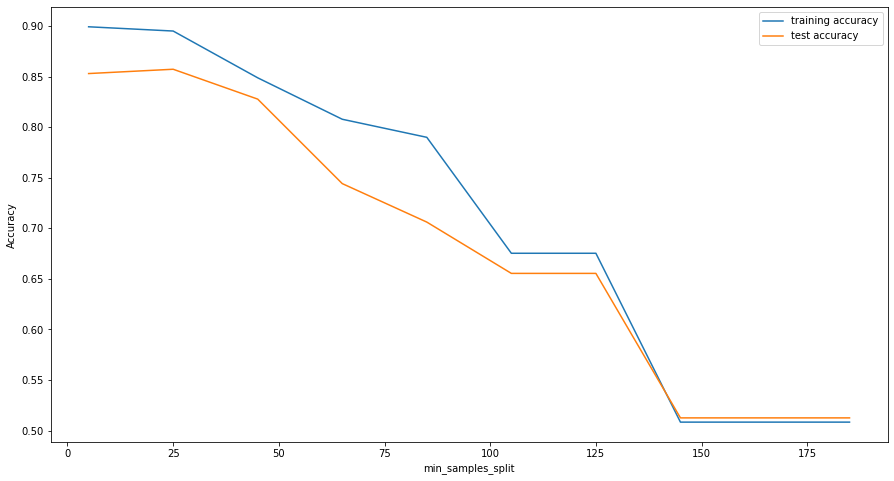

In [162]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.subplots(figsize=(15,8))
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [167]:
# Grid Search to Find Optimal Hyperparameters
# Create the parameter grid 
param_grid = {
    'max_depth': range(1,30),
    'min_samples_leaf': range(1,75),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = StratifiedKFold(n_splits = 5, shuffle = False, random_state = None)

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1, return_train_score=True)

# Fit the grid search to the data
grid_search.fit(X_train_cv,y_train_cv)

Fitting 5 folds for each of 8584 candidates, totalling 42920 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 42920 out of 42920 | elapsed:  3.6min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(1, 30),
                         'min_samples_leaf': range(1, 75),
                         'min_samples_split': range(50, 150, 50)},
             return_train_score=True, verbose=1)

In [168]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.002929,0.000416,0.001847,0.000142,entropy,1,1,50,"{'criterion': 'entropy', 'max_depth': 1, 'min_...",0.5,...,0.47039,0.045368,6105,0.494737,0.5,0.5,0.492147,0.497382,0.496853,0.003057
1,0.002543,0.000139,0.001605,0.000040,entropy,1,1,100,"{'criterion': 'entropy', 'max_depth': 1, 'min_...",0.5,...,0.47039,0.045368,6105,0.494737,0.5,0.5,0.492147,0.497382,0.496853,0.003057
2,0.002456,0.000132,0.001700,0.000097,entropy,1,2,50,"{'criterion': 'entropy', 'max_depth': 1, 'min_...",0.5,...,0.47039,0.045368,6105,0.494737,0.5,0.5,0.492147,0.497382,0.496853,0.003057
3,0.002407,0.000104,0.001685,0.000124,entropy,1,2,100,"{'criterion': 'entropy', 'max_depth': 1, 'min_...",0.5,...,0.47039,0.045368,6105,0.494737,0.5,0.5,0.492147,0.497382,0.496853,0.003057
4,0.002382,0.000059,0.001628,0.000051,entropy,1,3,50,"{'criterion': 'entropy', 'max_depth': 1, 'min_...",0.5,...,0.47039,0.045368,6105,0.494737,0.5,0.5,0.492147,0.497382,0.496853,0.003057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8579,0.001886,0.000136,0.001323,0.000085,gini,29,72,100,"{'criterion': 'gini', 'max_depth': 29, 'min_sa...",0.5,...,0.47039,0.045368,6105,0.494737,0.5,0.5,0.492147,0.497382,0.496853,0.003057
8580,0.002109,0.000152,0.001474,0.000137,gini,29,73,50,"{'criterion': 'gini', 'max_depth': 29, 'min_sa...",0.5,...,0.47039,0.045368,6105,0.494737,0.5,0.5,0.492147,0.497382,0.496853,0.003057
8581,0.002009,0.000062,0.001418,0.000073,gini,29,73,100,"{'criterion': 'gini', 'max_depth': 29, 'min_sa...",0.5,...,0.47039,0.045368,6105,0.494737,0.5,0.5,0.492147,0.497382,0.496853,0.003057
8582,0.001692,0.000151,0.001191,0.000101,gini,29,74,50,"{'criterion': 'gini', 'max_depth': 29, 'min_sa...",0.5,...,0.47039,0.045368,6105,0.494737,0.5,0.5,0.492147,0.497382,0.496853,0.003057


In [169]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.8315602836879433
DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=50)


In [180]:
# tree with max_depth = 3
clf_gini = DecisionTreeClassifier(criterion = "entropy", 
                                  random_state = 10,
                                  max_depth=5, 
                                  min_samples_leaf=60,
                                  min_samples_split=50)
clf_gini.fit(X_train_cv, y_train_cv)

# score
print(clf_gini.score(X_test_cv,y_test_cv))

0.875


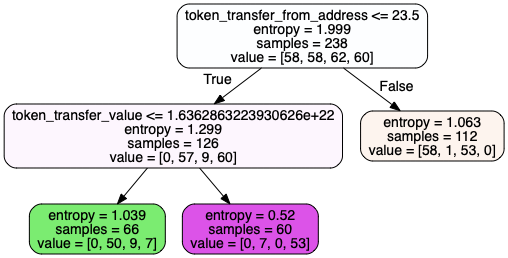

In [181]:
# plotting the tree
dot_data = StringIO()  
export_graphviz(clf_gini, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [182]:
# classification metrics
y_pred = clf_gini.predict(X_test_cv)
print(classification_report(y_test_cv, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      1.00      1.00        12
           2       0.00      0.00      0.00         2
           3       1.00      1.00      1.00         2

    accuracy                           0.88        16
   macro avg       0.50      0.50      0.50        16
weighted avg       0.88      0.88      0.88        16



In [183]:
# confusion matrix
print(confusion_matrix(y_test_cv,y_pred))

[[ 0  0  0  0]
 [ 0 12  0  0]
 [ 2  0  0  0]
 [ 0  0  0  2]]


# Random Forest

In [184]:
# Running the random forest with default parameters.
rfc = RandomForestClassifier()

# fit
rfc.fit(X_train_cv,y_train_cv)

RandomForestClassifier()

In [185]:
# Making predictions
predictions = rfc.predict(X_test_cv)

In [186]:
# Let's check the report of our default model
print(classification_report(y_test_cv,predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.92      0.96        12
           2       0.00      0.00      0.00         2
           3       0.67      1.00      0.80         2

    accuracy                           0.81        16
   macro avg       0.42      0.48      0.44        16
weighted avg       0.83      0.81      0.82        16



In [187]:
# Printing confusion matrix
print(confusion_matrix(y_test_cv,predictions))

[[ 0  0  0  0]
 [ 0 11  0  1]
 [ 2  0  0  0]
 [ 0  0  0  2]]


In [188]:
print(accuracy_score(y_test_cv,predictions))

0.8125


In [189]:
# Tuning max_features

# specify number of folds for k-fold CV
n_folds = StratifiedKFold(n_splits = 5, shuffle = False, random_state = None)

# parameters to build the model on
parameters = {'max_features': [2,4,6,8,10,12,14,16,18,20]}

# instantiate the model
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", 
                  return_train_score=True)

rf.fit(X_train_cv, y_train_cv)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(max_depth=4),
             param_grid={'max_features': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]},
             return_train_score=True, scoring='accuracy')

In [190]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.128857,0.003260,0.010812,0.000495,2,{'max_features': 2},0.791667,0.916667,0.916667,0.829787,...,0.869681,0.050331,2,0.905263,0.884211,0.894737,0.900524,0.900524,0.897052,0.007236
1,0.125971,0.009673,0.010265,0.000425,4,{'max_features': 4},0.854167,0.916667,0.916667,0.829787,...,0.882181,0.034754,1,0.910526,0.889474,0.894737,0.900524,0.900524,0.899157,0.007019
2,0.124271,0.003720,0.010027,0.000723,6,{'max_features': 6},0.791667,0.916667,0.916667,0.829787,...,0.869681,0.050331,2,0.910526,0.889474,0.894737,0.900524,0.900524,0.899157,0.007019
3,0.129325,0.005396,0.009743,0.001124,8,{'max_features': 8},0.791667,0.916667,0.916667,0.829787,...,0.869681,0.050331,2,0.910526,0.889474,0.894737,0.900524,0.900524,0.899157,0.007019
4,0.119718,0.005785,0.009226,0.001223,10,{'max_features': 10},0.791667,0.916667,0.916667,0.829787,...,0.869681,0.050331,2,0.910526,0.889474,0.894737,0.900524,0.895288,0.898110,0.007126


<Figure size 1440x1440 with 0 Axes>

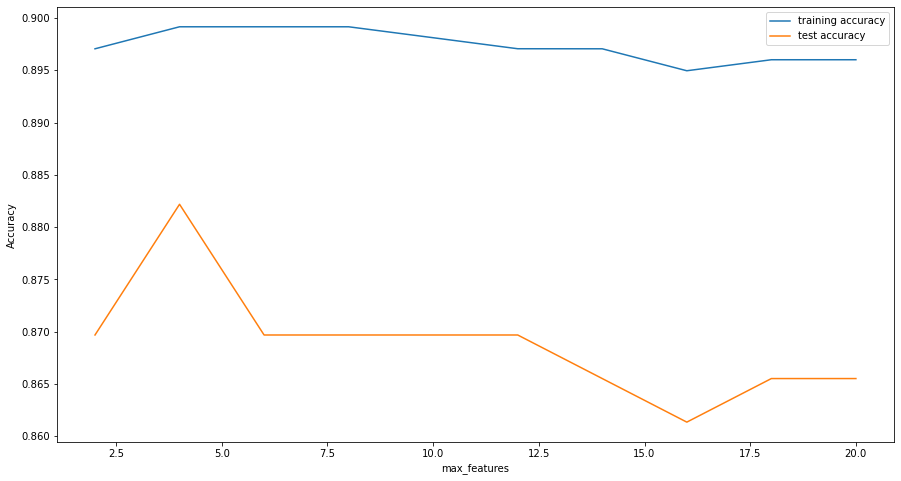

In [191]:
# plotting accuracies with max_features
plt.figure()
plt.subplots(figsize=(15,8))
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [200]:
# Tuning min_samples_leaf
# GridSearchCV to find optimal min_samples_leaf
# specify number of folds for k-fold CV
n_folds = StratifiedKFold(n_splits = 5, shuffle = False, random_state = None)

# parameters to build the model on
parameters = {'min_samples_leaf': range(1,10)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", 
                  return_train_score=True)

rf.fit(X_train_cv, y_train_cv)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(),
             param_grid={'min_samples_leaf': range(1, 10)},
             return_train_score=True, scoring='accuracy')

In [201]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.131316,0.008850,0.010750,0.000643,1,{'min_samples_leaf': 1},0.791667,0.916667,0.916667,0.829787,...,0.869681,0.050331,1,0.910526,0.889474,0.894737,0.900524,0.900524,0.899157,0.007019
1,0.121878,0.007489,0.010025,0.001773,2,{'min_samples_leaf': 2},0.791667,0.916667,0.916667,0.829787,...,0.869681,0.050331,1,0.905263,0.884211,0.894737,0.900524,0.900524,0.897052,0.007236
2,0.117090,0.009297,0.008668,0.000602,3,{'min_samples_leaf': 3},0.791667,0.916667,0.916667,0.829787,...,0.869681,0.050331,1,0.905263,0.884211,0.894737,0.900524,0.895288,0.896004,0.007034
3,0.110741,0.012948,0.009680,0.001248,4,{'min_samples_leaf': 4},0.791667,0.916667,0.916667,0.829787,...,0.869681,0.050331,1,0.905263,0.889474,0.889474,0.900524,0.895288,0.896004,0.006196
4,0.112979,0.008554,0.008943,0.000569,5,{'min_samples_leaf': 5},0.791667,0.916667,0.916667,0.829787,...,0.865426,0.049009,5,0.905263,0.884211,0.889474,0.900524,0.884817,0.892858,0.008527


<Figure size 1440x1440 with 0 Axes>

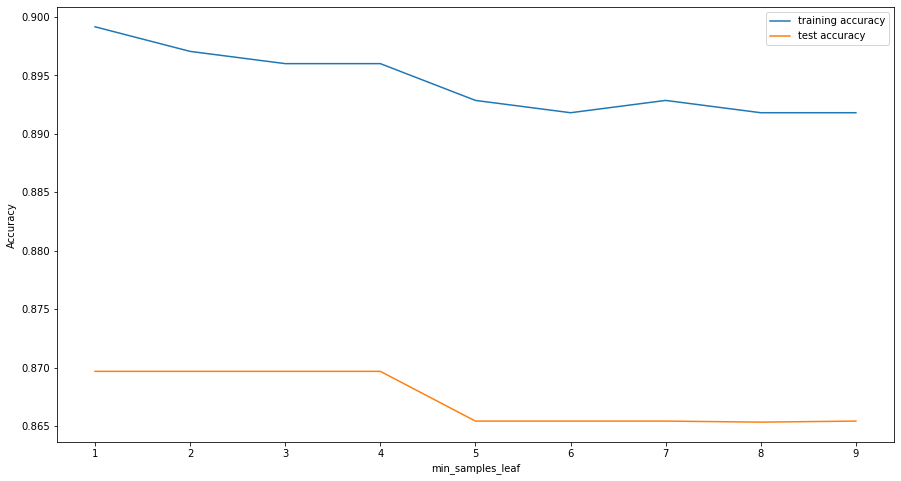

In [202]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.subplots(figsize=(15,8))
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [206]:
# Tuning min_samples_split
# GridSearchCV to find optimal min_samples_split
# specify number of folds for k-fold CV
n_folds = StratifiedKFold(n_splits = 5, shuffle = False, random_state = None)

# parameters to build the model on
parameters = {'min_samples_split': range(1,80)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", 
                  return_train_score=True)

rf.fit(X_train_cv, y_train_cv)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(),
             param_grid={'min_samples_split': range(1, 80)},
             return_train_score=True, scoring='accuracy')

In [207]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.041102,0.000939,0.000000,0.000000,1,{'min_samples_split': 1},NaN,NaN,NaN,NaN,...,NaN,NaN,79,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.119366,0.011294,0.008816,0.001411,2,{'min_samples_split': 2},0.791667,0.937500,0.916667,0.829787,...,0.873848,0.054719,6,0.910526,0.889474,0.894737,0.900524,0.900524,0.899157,0.007019
2,0.113497,0.013923,0.009783,0.001215,3,{'min_samples_split': 3},0.791667,0.916667,0.916667,0.829787,...,0.869681,0.050331,8,0.910526,0.889474,0.894737,0.900524,0.900524,0.899157,0.007019
3,0.109128,0.008553,0.008919,0.001073,4,{'min_samples_split': 4},0.854167,0.916667,0.916667,0.829787,...,0.882181,0.034754,1,0.910526,0.889474,0.894737,0.900524,0.900524,0.899157,0.007019
4,0.102218,0.005916,0.008242,0.000788,5,{'min_samples_split': 5},0.791667,0.916667,0.916667,0.829787,...,0.869681,0.050331,8,0.910526,0.889474,0.894737,0.900524,0.900524,0.899157,0.007019


<Figure size 1440x1440 with 0 Axes>

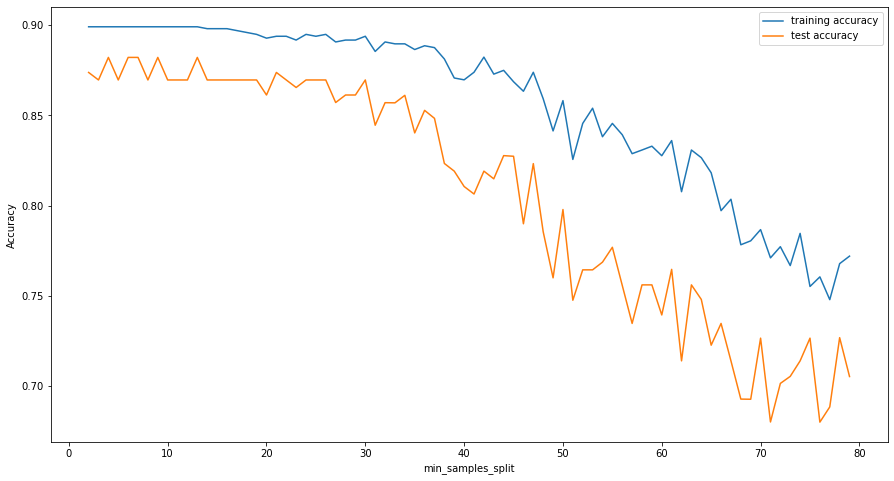

In [208]:
# plotting accuracies with min_samples_split
plt.figure()
plt.subplots(figsize=(15,8))
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [209]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [2,4,6,8,10],
    'min_samples_leaf': range(1,10),
    'min_samples_split': range(1,80),
    'n_estimators': [10,50,100], 
    'max_features': [5, 10, 20]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1, return_train_score=True)

In [210]:
# Fit the grid search to the data
grid_search.fit(X_train_cv, y_train_cv)

Fitting 3 folds for each of 31995 candidates, totalling 95985 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:   15.0s
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:   21.6s
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed:   29.9s
[Parallel(n_jobs=-1)]: Done 2426 tasks      | elapsed:   39.7s
[Parallel(n_jobs=-1)]: Done 3176 tasks      | elapsed:   51.4s
[Parallel(n_jobs=-1)]: Done 4026 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 4976 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 6026 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 7176 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 8426 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 9776 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 11226 tasks      

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 6, 8, 10],
                         'max_features': [5, 10, 20],
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(1, 80),
                         'n_estimators': [10, 50, 100]},
             return_train_score=True, verbose=1)

In [211]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.869831223628692 using {'max_depth': 4, 'max_features': 5, 'min_samples_leaf': 4, 'min_samples_split': 18, 'n_estimators': 10}


In [212]:
# Fitting the final model with the best parameters obtained from grid search.
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=4,
                             min_samples_leaf=4, 
                             min_samples_split=18,
                             max_features=5,
                             n_estimators=100)

In [213]:
rfc.fit(X_train_cv,y_train_cv)

RandomForestClassifier(max_depth=4, max_features=5, min_samples_leaf=4,
                       min_samples_split=18)

In [214]:
# evaluation metrics
print(classification_report(y_test_cv,predictions))
print(confusion_matrix(y_test_cv,predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.92      0.96        12
           2       0.00      0.00      0.00         2
           3       0.67      1.00      0.80         2

    accuracy                           0.81        16
   macro avg       0.42      0.48      0.44        16
weighted avg       0.83      0.81      0.82        16

[[ 0  0  0  0]
 [ 0 11  0  1]
 [ 2  0  0  0]
 [ 0  0  0  2]]


# XGBoost

In [216]:
# Fitting the decision tree with default hyperparameters, apart from
model = XGBClassifier()
model.fit(X_train_cv, y_train_cv)

[22:36:53] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

[22:37:32] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:37:32] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:37:32] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:37:32] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1

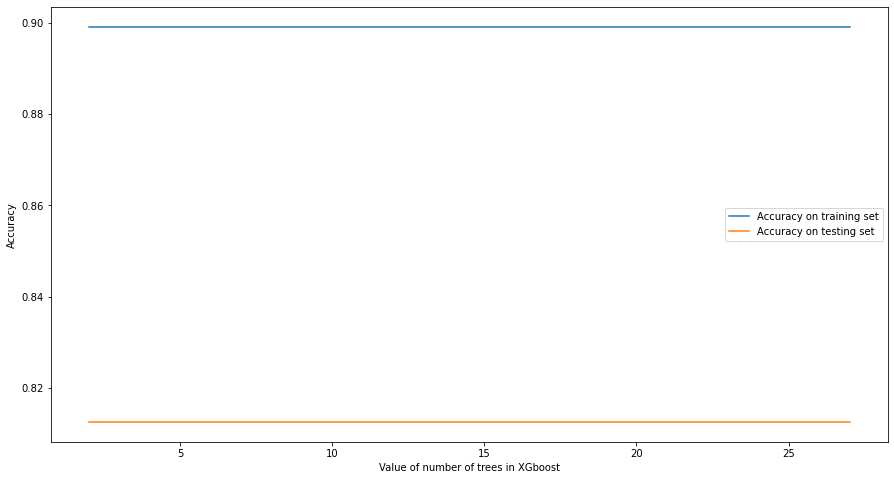

In [217]:
tree_range = range(2, 30, 5)
score1=[]
score2=[]
for tree in tree_range:
    xgb=XGBClassifier(n_estimators=tree)
    xgb.fit(X_train_cv,y_train_cv)
    score1.append(xgb.score(X_train_cv,y_train_cv))
    score2.append(xgb.score(X_test_cv,y_test_cv))
    
%matplotlib inline
plt.subplots(figsize=(15,8))
plt.plot(tree_range,score1,label= 'Accuracy on training set')
plt.plot(tree_range,score2,label= 'Accuracy on testing set')
plt.xlabel('Value of number of trees in XGboost')
plt.ylabel('Accuracy')
plt.legend()

In [218]:
# make predictions for test data
# use predict_proba since we need probabilities to compute auc
y_pred = model.predict_proba(X_test_cv)
y_pred[:10]

array([[3.2775494e-04, 9.9878150e-01, 2.4584774e-04, 6.4492354e-04],
       [7.8112787e-01, 1.3978929e-03, 2.1591248e-01, 1.5617282e-03],
       [4.5108813e-04, 9.9747699e-01, 1.1842903e-03, 8.8760722e-04],
       [3.2775494e-04, 9.9878150e-01, 2.4584774e-04, 6.4492354e-04],
       [4.1791803e-04, 9.9844629e-01, 3.1347875e-04, 8.2233746e-04],
       [3.4784223e-03, 2.1681742e-01, 2.6091526e-03, 7.7709496e-01],
       [3.2775494e-04, 9.9878150e-01, 2.4584774e-04, 6.4492354e-04],
       [6.0718798e-04, 9.9855560e-01, 4.5544939e-04, 3.8175954e-04],
       [4.1745289e-04, 9.9766517e-01, 1.0959840e-03, 8.2142308e-04],
       [7.8112787e-01, 1.3978929e-03, 2.1591248e-01, 1.5617282e-03]],
      dtype=float32)

In [219]:
sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=model.predict(X_test)
)

print(sk_report)

              precision    recall  f1-score   support

           0   0.000000  0.000000  0.000000         0
           1   1.000000  0.916667  0.956522        12
           2   0.000000  0.000000  0.000000         2
           3   0.666667  1.000000  0.800000         2

    accuracy                       0.812500        16
   macro avg   0.416667  0.479167  0.439130        16
weighted avg   0.833333  0.812500  0.817391        16



In [222]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = StratifiedKFold(n_splits = 5, shuffle = False, random_state = None)

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          

# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      


In [223]:
# fit the model
model_cv.fit(X_train_cv, y_train_cv)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[22:52:15] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[22:52:16] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:52:16] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:52:16] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:52:16] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1

[22:52:23] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:52:23] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    8.4s finished


[22:52:24] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=2, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=200, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=Non

In [224]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.214590,0.126493,0.002226,0.000166,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.854167,0.9375,0.916667,...,0.886348,0.039556,2,0.910526,0.889474,0.894737,0.900524,0.900524,0.899157,0.007019
1,0.352955,0.129396,0.002506,0.000250,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.791667,0.9375,0.916667,...,0.873848,0.054719,3,0.910526,0.889474,0.894737,0.900524,0.900524,0.899157,0.007019
2,0.215538,0.036808,0.002302,0.000226,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.791667,0.9375,0.916667,...,0.873848,0.054719,3,0.910526,0.889474,0.894737,0.900524,0.900524,0.899157,0.007019
3,0.301758,0.168793,0.002320,0.000386,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.854167,0.9375,0.916667,...,0.890603,0.033996,1,0.910526,0.889474,0.894737,0.900524,0.900524,0.899157,0.007019
4,0.300467,0.220696,0.002672,0.000298,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.791667,0.9375,0.895833,...,0.869681,0.052027,6,0.910526,0.889474,0.894737,0.900524,0.900524,0.899157,0.007019
5,0.257620,0.060854,0.002575,0.000323,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.791667,0.9375,0.916667,...,0.873848,0.054719,3,0.910526,0.889474,0.894737,0.900524,0.900524,0.899157,0.007019


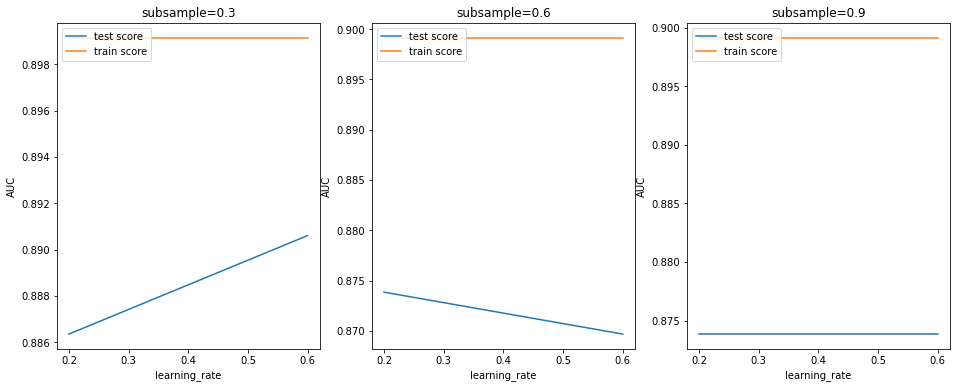

In [225]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    #plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    #plt.xscale('log')

In [226]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for auc

#The results show that a subsample size of 0.6 and learning_rate of about 0.2 seems optimal.
#Also, XGBoost has resulted in the highest ROC AUC obtained (across various hyperparameters).

params = {'learning_rate': 0.2,
          'max_depth': 2, 
          'n_estimators':100,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
model = XGBClassifier(params = params)
model.fit(X_train_cv, y_train_cv)

[22:53:28] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:541: 
Parameters: { params } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:53:28] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1,
              objective='multi:softprob',
              params={'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 100,
                      'objective': 'binary:logistic', 'subsample': 0.9},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [227]:
y_pred = model.predict_proba(X_test_cv)
predictions = model.predict(X_test_cv)
y_pred[:10]

array([[3.2775494e-04, 9.9878150e-01, 2.4584774e-04, 6.4492354e-04],
       [7.8112787e-01, 1.3978929e-03, 2.1591248e-01, 1.5617282e-03],
       [4.5108813e-04, 9.9747699e-01, 1.1842903e-03, 8.8760722e-04],
       [3.2775494e-04, 9.9878150e-01, 2.4584774e-04, 6.4492354e-04],
       [4.1791803e-04, 9.9844629e-01, 3.1347875e-04, 8.2233746e-04],
       [3.4784223e-03, 2.1681742e-01, 2.6091526e-03, 7.7709496e-01],
       [3.2775494e-04, 9.9878150e-01, 2.4584774e-04, 6.4492354e-04],
       [6.0718798e-04, 9.9855560e-01, 4.5544939e-04, 3.8175954e-04],
       [4.1745289e-04, 9.9766517e-01, 1.0959840e-03, 8.2142308e-04],
       [7.8112787e-01, 1.3978929e-03, 2.1591248e-01, 1.5617282e-03]],
      dtype=float32)

In [228]:
#print the evaluation score on the X_test by choosing the best evaluation metric
accuracy = sklearn.metrics.accuracy_score(y_test, predictions)
precision=sklearn.metrics.precision_score(y_test, predictions,average='macro')
recall=sklearn.metrics.recall_score(y_test, predictions, average='macro')
print("Accuracy: %.2f%% " % (accuracy * 100.0))
print("Precision: %.2f%% " % (precision *100))
print("Recall: %.2f%% " % (recall * 100))


Accuracy: 81.25% 
Precision: 41.67% 
Recall: 47.92% 


In [229]:
# feature importance
importance = dict(zip(X_train_cv.columns, model.feature_importances_))
importance

{'receipt_status': 0.0021251754,
 'Contract_is_erc20': 0.02854033,
 'trace_from_address': 0.014292028,
 'trace_to_address': 0.001432432,
 'trace_value': 0.0008820237,
 'trace_gas': 0.018620575,
 'trace_gas_used': 0.00090762746,
 'token_transfer_from_address': 0.003826349,
 'token_transfer_to_address': 0.009667177,
 'token_transfer_value': 0.036398325,
 'transaction_from_address': 0.4646974,
 'transaction_to_address': 0.011524231,
 'transaction_value': 0.0,
 'transaction_gas': 0.00031577106,
 'transaction_gas_price': 0.03128463,
 'receipt_cumulative_gas_used': 0.024552545,
 'receipt_gas_used': 0.08492816,
 'token_decimals': 0.011017002,
 'token_total_supply': 0.25304526,
 'Contract_address': 0.00194288}

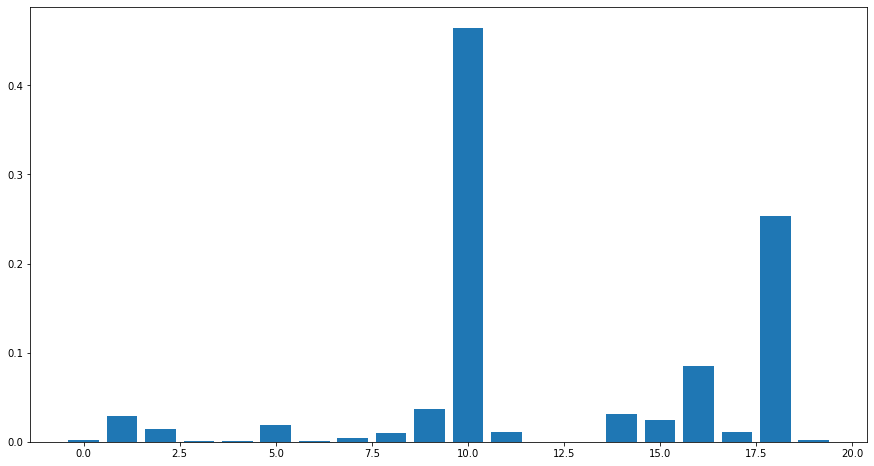

In [230]:
# plot
plt.subplots(figsize=(15,8))
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()

In [232]:
clf = XGBClassifier(params = params)  #initialise the model with optimum hyperparameters
clf.fit(X_train_cv, y_train_cv)

#print the evaluation score on the X_test by choosing the best evaluation metric
accuracy = sklearn.metrics.accuracy_score(y_test_cv, predictions)
precision=sklearn.metrics.precision_score(y_test_cv, predictions,average='macro')
recall=sklearn.metrics.recall_score(y_test_cv, predictions,average='macro')

print("Accuracy: %.2f%% " % (accuracy * 100.0))
print("Precision: %.2f%% " % (precision *100))
print("Recall: %.2f%% " % (recall * 100))


[23:04:13] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:541: 
Parameters: { params } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:04:13] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 81.25% 
Precision: 41.67% 
Recall: 47.92% 


### Print the important features of the best model to understand the dataset

Top var = 11
2nd Top var = 19
3rd Top var = 17


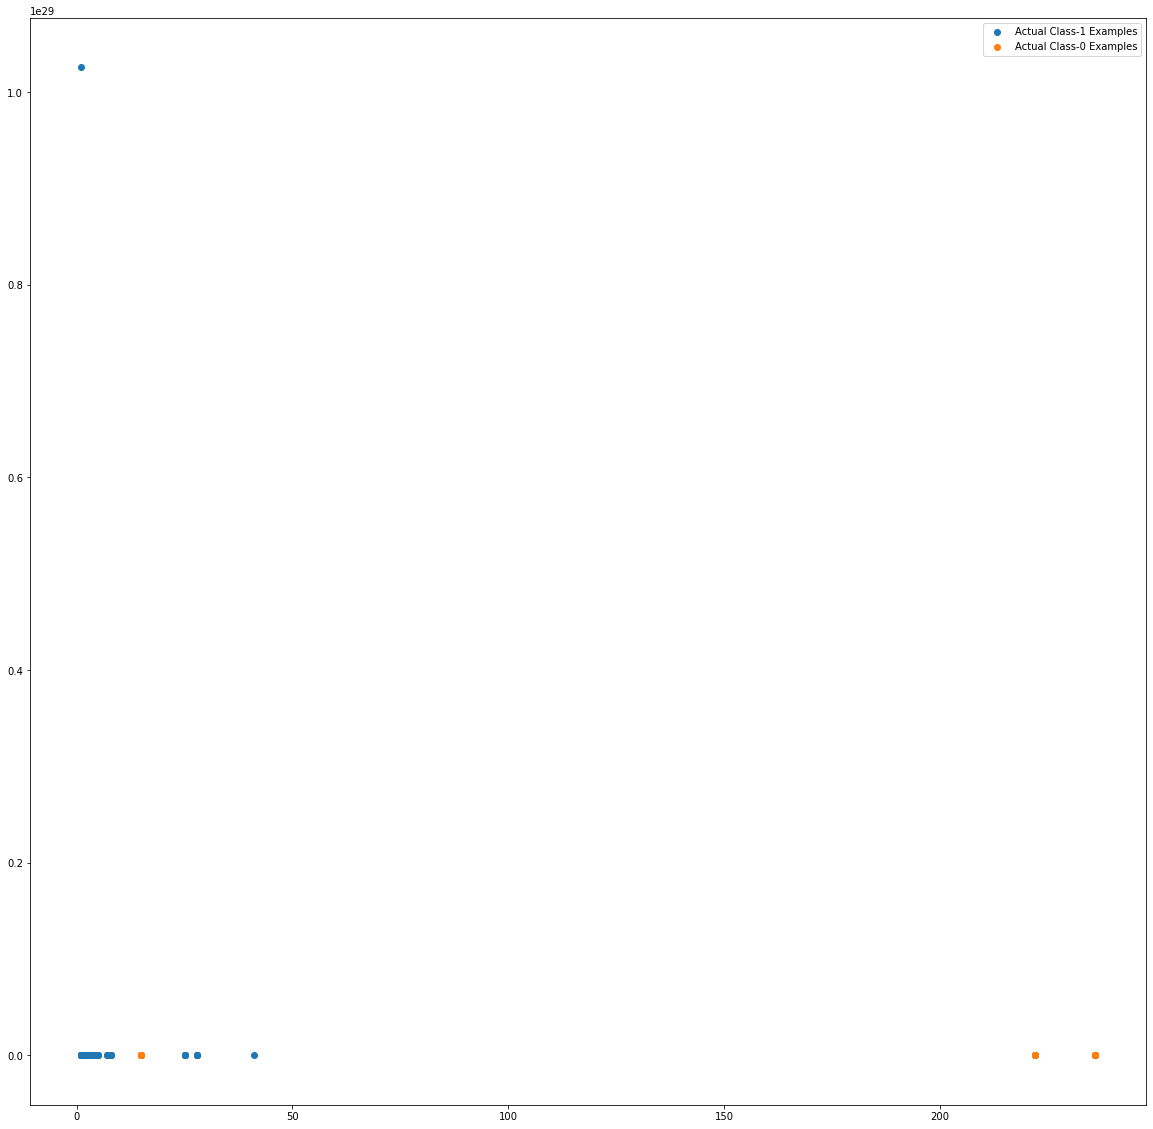

In [236]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_3 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_2 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], 
            X_train_1[:, second_top_var_index], 
            label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], 
            X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()



In [237]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [238]:
#### Print the FPR,TPR & select the best threshold from the roc curve

# # Let's take a look at the confusion matrix again 
print("confusion matrix:")
confusion = confusion_matrix(y_test_cv,predictions)
print(confusion)
print('\n')

# Let's check the overall accuracy.
accuracy = sklearn.metrics.accuracy_score(y_test_cv, predictions)
print("Accuracy    : %.2f%% " % (accuracy * 100.0))


TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Let's see the sensitivity 
sensitivity = TP / float(TP+FN)
print("Sensitivity : %.2f%% " % (sensitivity * 100.0))

# Let us calculate specificity
specificity = TN / float(TN+FP)
print("Specificity : %.2f%% " % (specificity * 100.0))
print('\n')

# Calculate True postive rate 
print("True Postive Rate : %.2f%% " % (sensitivity * 100.0))


# Calculate false postive rate - predicting Fraud when customer does not have non-Fraud
FPR = FP/ float(TN+FP)
print("False Postive Rate : %.2f%% " % (FPR * 100.0))

# positive predictive value 
PPV = TP / float(TP+FP)
print("Positive Predictive Value : %.2f%% " % (PPV * 100.0))

# Negative predictive value
NPV = TN / float(TN+ FN)
print("Negative Predictive Value : %.2f%% " % (NPV * 100.0))

confusion matrix:
[[ 0  0  0  0]
 [ 0 11  0  1]
 [ 2  0  0  0]
 [ 0  0  0  2]]


Accuracy    : 81.25% 
Sensitivity : 100.00% 
Specificity : nan% 


True Postive Rate : 100.00% 
False Postive Rate : nan% 
Positive Predictive Value : 100.00% 
Negative Predictive Value : nan% 
